In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import auc

# 1. Analysis for 3.74mg BIOTIN concentration

## 1.1 Full Experiment View

Successfully generated plots.


<Figure size 1042.91x720.472 with 0 Axes>

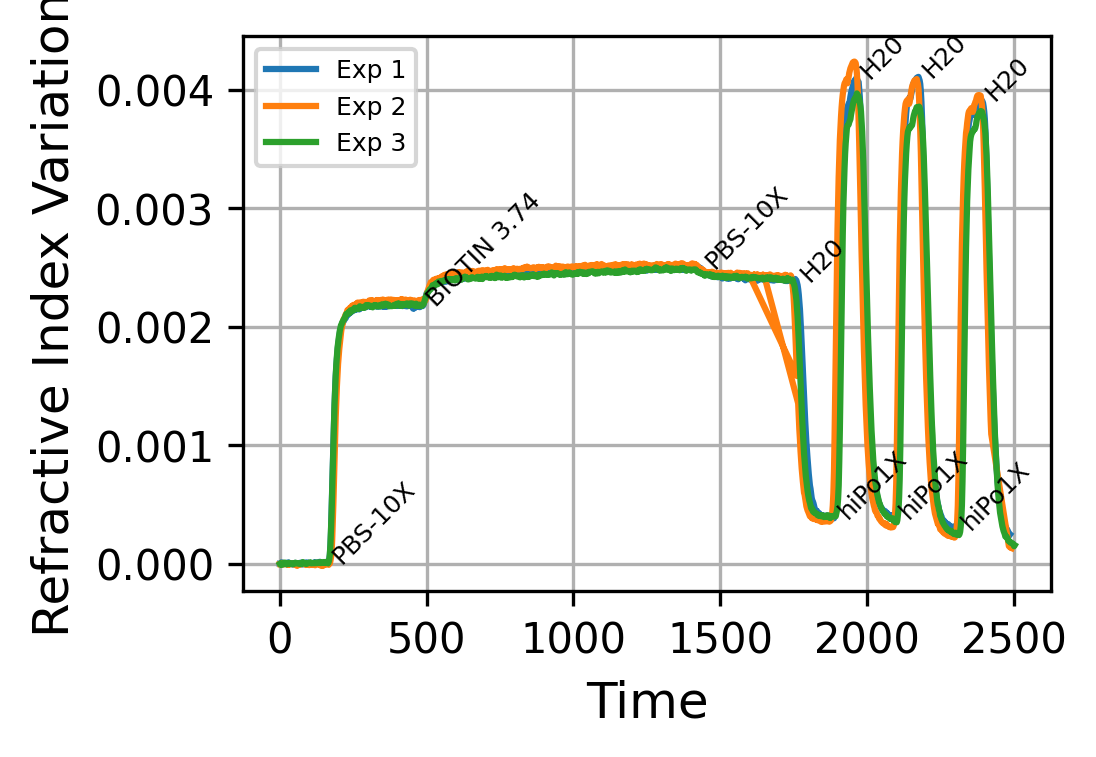

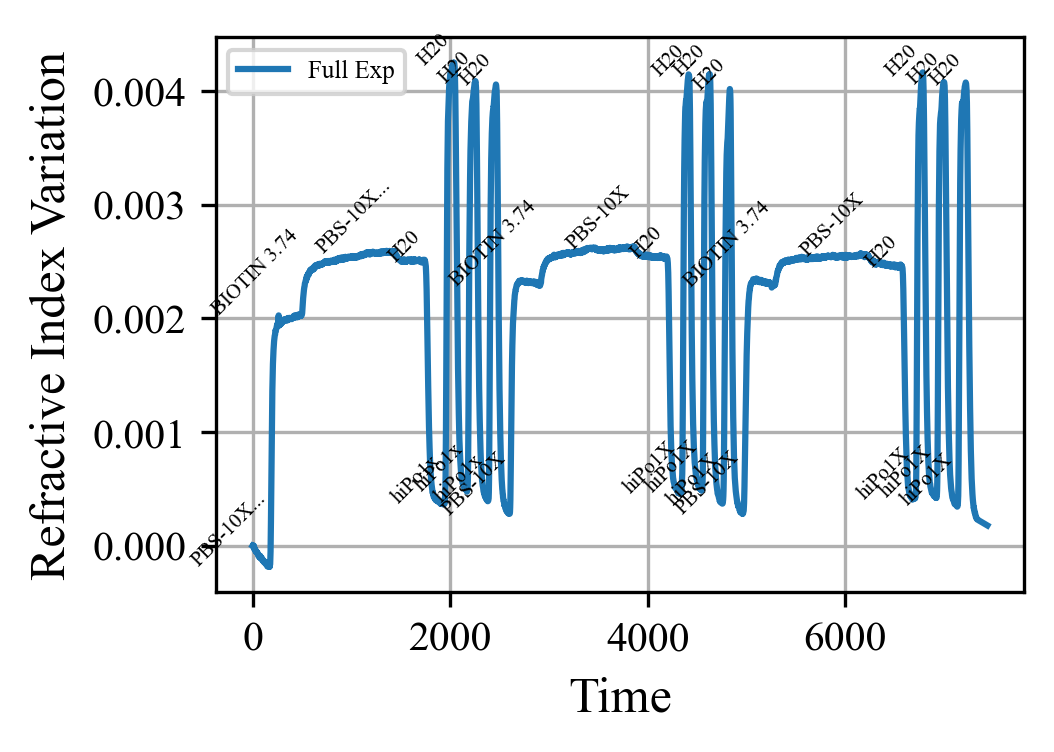

In [2]:
# File paths
file_first = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_biotin (FIRST).csv'
file_second = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_biotin (SECOND).csv'
file_third = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_BIOTIN (THIRD).csv'
file_tree_corrected = 'Data/Data_biotin/RODRIGO 06-08_BIOTIN_tree_corrected.csv'
plt.rc("axes", titlesize=14)  # Title font size
plt.rc("axes", labelsize=14)  # Label font size
plt.rc("xtick", labelsize=12)  # X-tick font size
plt.rc("ytick", labelsize=12)  # Y-tick font size
plt.rc("legend", fontsize=12)  # Legend font size

# Define a list of colors for each experiment
colors = [
    "blue",
    "green",
    "red",
    "orange",
    "purple",
    "brown",
    "pink",
    "cyan",
]  # Extend if needed

plt.rc("axes", titlesize=12, labelsize=12)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
plt.rc("legend", fontsize=6) # Slightly larger for readability in individual plots

# Create the figure with the correct aspect ratio
# Each plot is 6cm wide (18cm / 3) and we'll choose 8cm for the height.
# 1 inch = 2.54 cm
width_cm = 8.83
height_cm = 6.1
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54),dpi = 300)
# Let's try to read the files with error handling
try:
    df1 = pd.read_csv(file_first, sep=';', on_bad_lines='skip')
    df2 = pd.read_csv(file_second, sep=';', on_bad_lines='skip')
    # The error was in the third file, so let's pay special attention to it.
    df3 = pd.read_csv(file_third, sep=';', on_bad_lines='skip')
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')

    # Clean up column names by stripping whitespace
    df1.columns = [col.strip() for col in df1.columns]
    df2.columns = [col.strip() for col in df2.columns]
    df3.columns = [col.strip() for col in df3.columns]
    df_tree.columns = [col.strip() for col in df_tree.columns]

    # Convert columns to numeric, coercing errors
    for df in [df1, df2, df3, df_tree]:
        for col in ['Time', 'Refractive Index', 'Temperature']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with NaN values in crucial columns
    df1.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df2.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df3.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)


    # --- Plotting the three "ONLY ONE" experiments ---
    plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54),dpi = 300)
    # plt.title('Three repetitions of the same experiment')
    plt.xlabel('Time')
    plt.ylabel('Refractive Index Variation')

    plt.plot(df1['Time'], df1['Refractive Index'], label='Exp 1')
    for _, row in df1[df1['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45,size = 6)

    plt.plot(df2['Time'], df2['Refractive Index'], label='Exp 2')
    # for _, row in df2[df2['Comment'].notna()].iterrows():
    #     plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45,size = 5)

    plt.plot(df3['Time'], df3['Refractive Index'], label='Exp 3')
    # for _, row in df3[df3['Comment'].notna()].iterrows():
    #     plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45,size = 5)

    plt.legend()
    plt.grid(True)
    plt.savefig('BiotinPlots/only_one_experiments.pdf', bbox_inches='tight')
    plt.savefig('BiotinPlots/only_one_experiments.svg', bbox_inches='tight', transparent=True)
    plt.rc("font", family="times new roman", size=12)  # Use the default serif font


    # --- Plotting the "tree_corrected" experiments ---
    plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54), dpi = 300)
    # plt.title('Three experiments from tree_corrected file')
    plt.xlabel('Time')
    plt.ylabel('Refractive Index Variation')

    comment_indices = df_tree[df_tree['Comment'].notna()].index.tolist()
    start_index = 0
    # The comments in this file seem to be marking the *end* of one phase and the beginning of another
    # So we can't cleanly split into 3 experiments in a simple way just by the comment.
    # A better approach for this file might be to just plot the whole thing, and annotate
    plt.plot(df_tree['Time'], df_tree['Refractive Index'], label='Full Exp')
    for _, row in df_tree[df_tree['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45, ha='right',size = 5)

    plt.legend()
    plt.grid(True)
    plt.savefig('BiotinPlots/tree_corrected_experiments.pdf', bbox_inches='tight')
    plt.savefig('BiotinPlots/tree_corrected_experiments.svg', bbox_inches='tight', transparent=True)
    plt.rc("font", family="times new roman", size=12)  # Use the default serif font

    print("Successfully generated plots.")

except Exception as e:
    print(f"An error occurred: {e}")

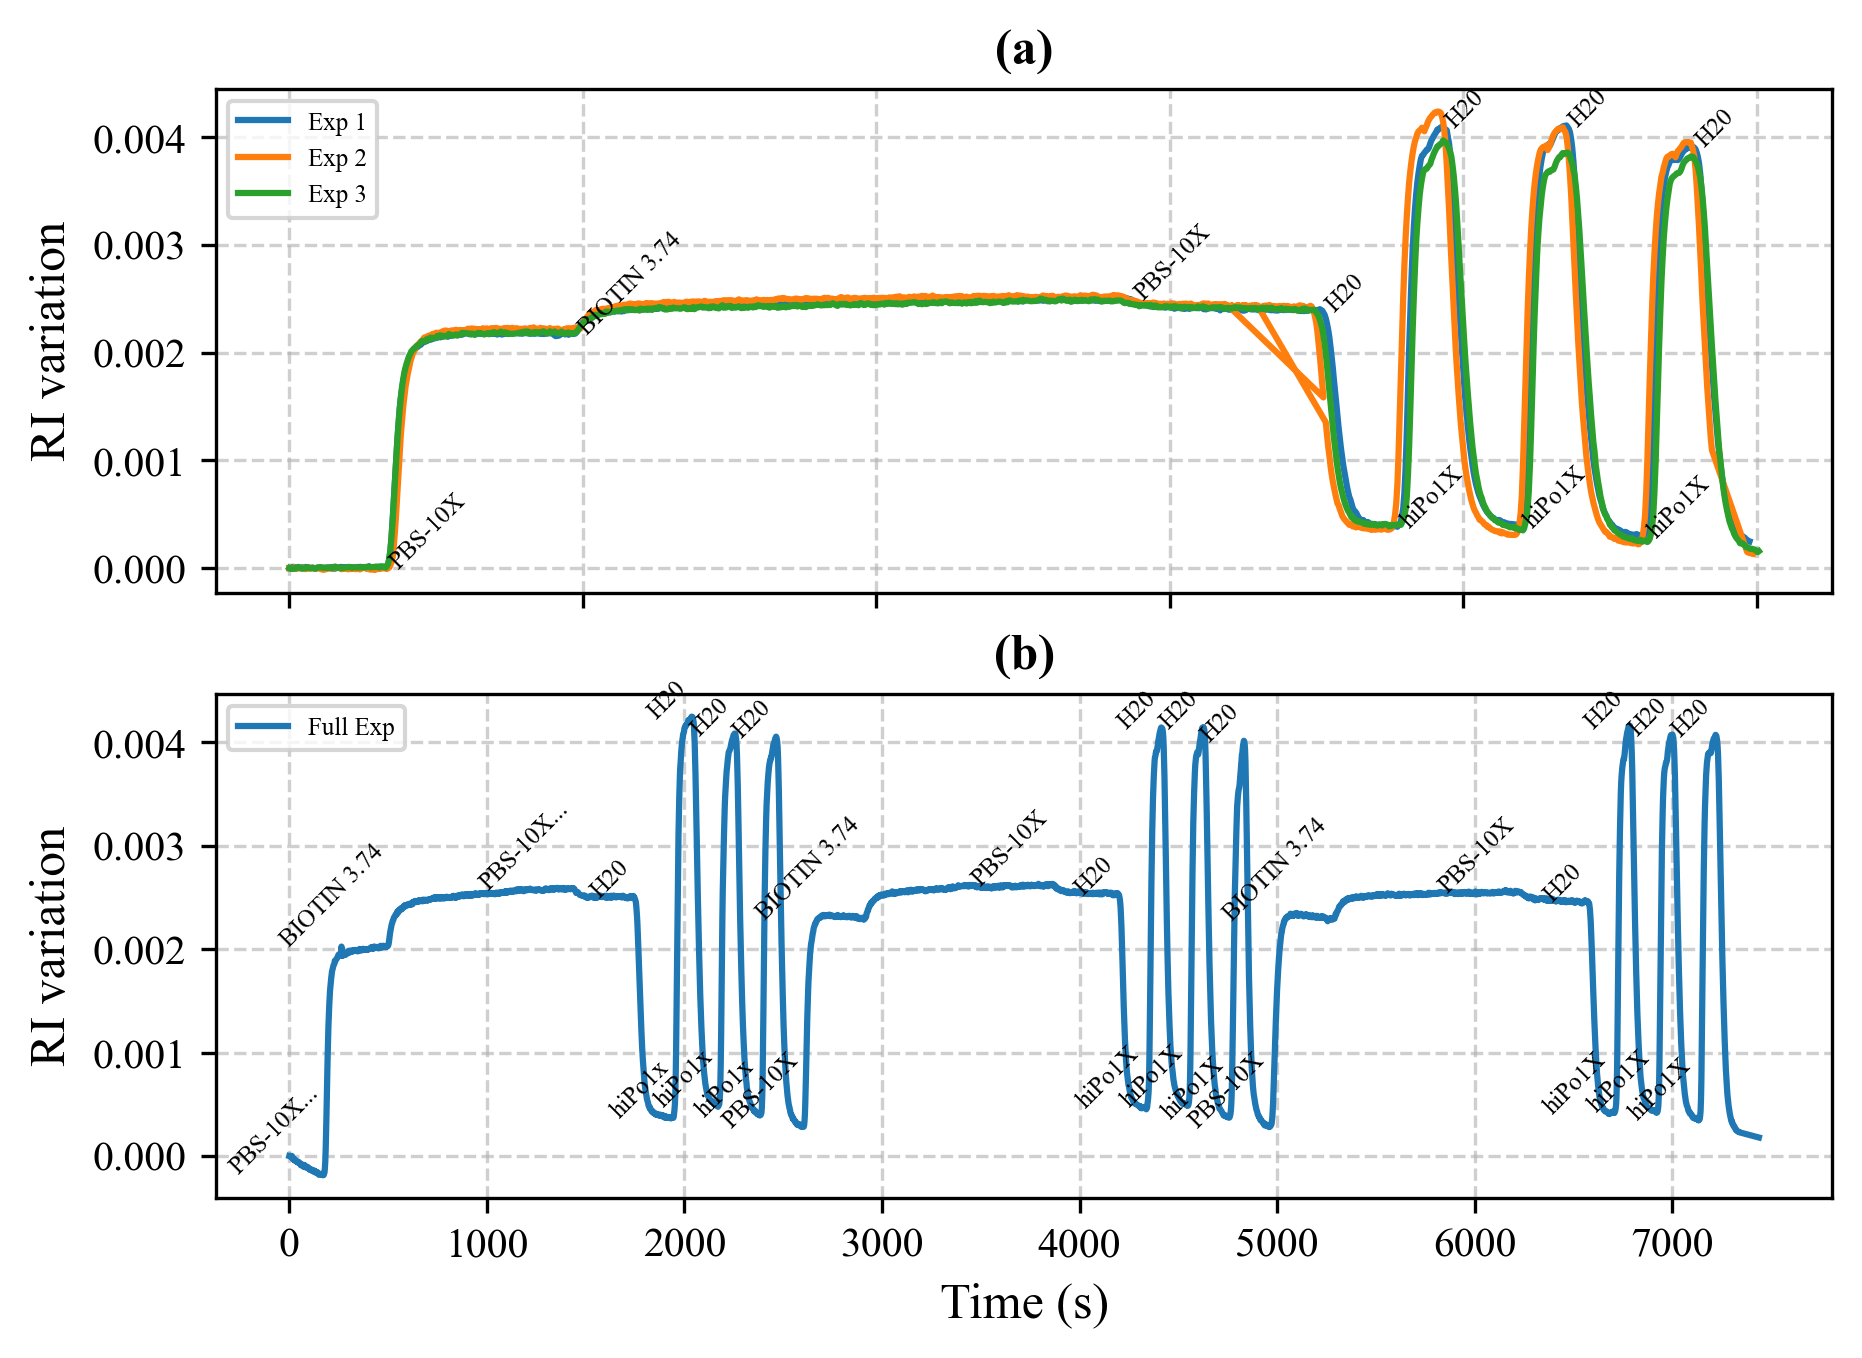

Successfully generated and saved the combined plot.


In [5]:
try:
    # Read CSV files
    df1 = pd.read_csv(file_first, sep=';', on_bad_lines='skip')
    df2 = pd.read_csv(file_second, sep=';', on_bad_lines='skip')
    df3 = pd.read_csv(file_third, sep=';', on_bad_lines='skip')
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')

    dataframes = [df1, df2, df3, df_tree]

    # Standardize column names and data types
    for df in dataframes:
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index', 'Temperature']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    
    # --- Plotting ---

    # Define figure dimensions for A4 paper (single column width, double height)
    width_cm = 8.83*2
    height_cm = 12.2 
    
    # Create a figure with two subplots stacked vertically
    fig, axes = plt.subplots(
        nrows=2, 
        ncols=1, 
        figsize=(width_cm / 2.54, height_cm / 2.54), 
        dpi=300
    )

    # --- Plot (a): Three separate, calibrated experiments ---
    ax1 = axes[0]
    ax1.set_title('(a)', loc='center', weight='bold')
    ax1.set_ylabel('RI variation')
    
    # Plot data for each experiment
    ax1.plot(df1['Time'], df1['Refractive Index'], label='Exp 1', linewidth=1.5)
    ax1.plot(df2['Time'], df2['Refractive Index'], label='Exp 2', linewidth=1.5)
    ax1.plot(df3['Time'], df3['Refractive Index'], label='Exp 3', linewidth=1.5)

    # Add annotations from the first experiment's comments
    for _, row in df1[df1['Comment'].notna()].iterrows():
        ax1.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45, size=6)

    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.tick_params(axis='x', labelbottom=False) # Hide x-axis labels to save space

    # --- Plot (b): Full experiment with a single calibration ---
    ax2 = axes[1]
    ax2.set_title('(b)', loc='center', weight='bold')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('RI variation')

    # Plot the full, long experiment
    ax2.plot(df_tree['Time'], df_tree['Refractive Index'], label='Full Exp', color='tab:blue', linewidth=1.5)

    # Add annotations for key events
    for _, row in df_tree[df_tree['Comment'].notna()].iterrows():
        ax2.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45, ha='right', size=6)

    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)

    # Adjust layout to prevent labels from overlapping and save the combined figure
    # plt.tight_layout(pad=0.5)
    plt.savefig('BiotinPlots/combined_experiments.pdf', bbox_inches='tight')
    plt.savefig('BiotinPlots/combined_experiments.svg', bbox_inches='tight', transparent=True)
    
    plt.show()

    print("Successfully generated and saved the combined plot.")

except FileNotFoundError as e:
    print(f"Error: Could not find the file. Please check the path: {e.filename}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

## 1.2 Biotin View

Processing segment: Experiment 1
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=486.07 to t=1434.059
Processing segment: Experiment 2
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=496.083 to t=1414.033
Processing segment: Experiment 3
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=482.065 to t=1416.096
Processing segment: Three Corrected Exp 1
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=500.088 to t=1442.069
Processing segment: Three Corrected Exp 2
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=2912.052 to t=3866.048
Processing segment: Three Corrected Exp 3
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=5278.018 to t=6226.007

Successfully generated the plot of all specified segments.


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


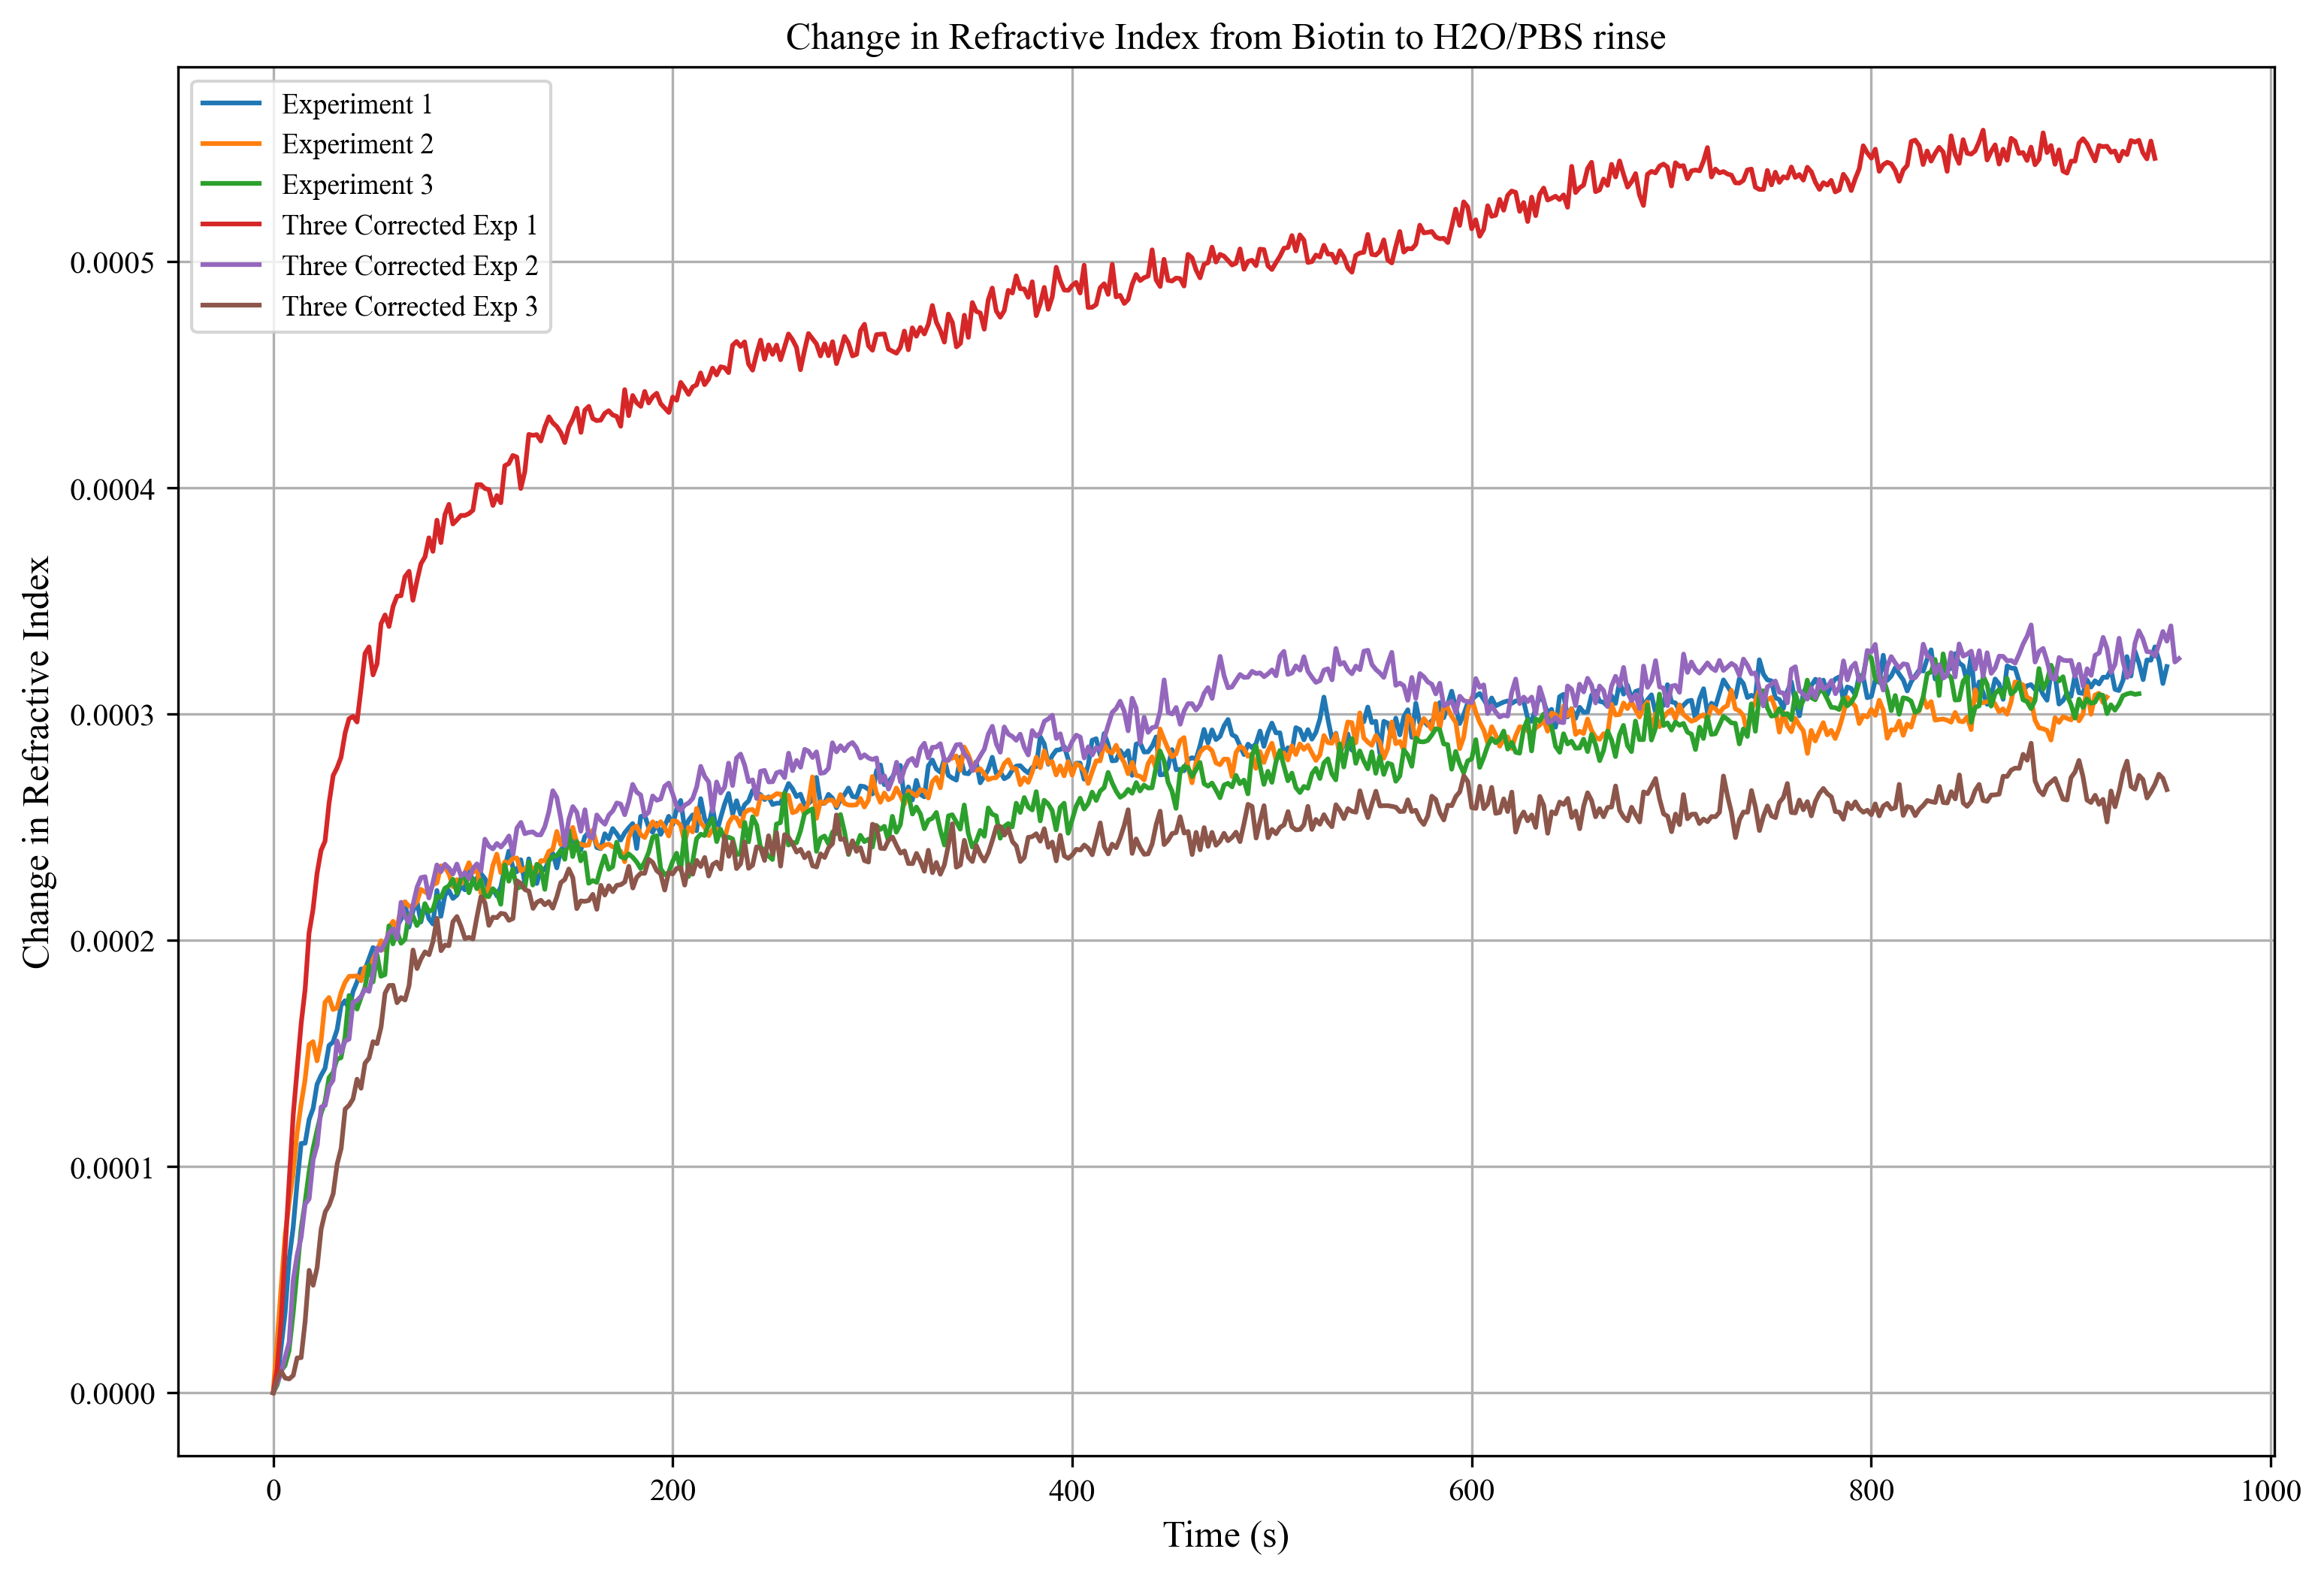

In [53]:
# --- Function to find, normalize, and plot a segment ---
def plot_segment(df, label, ax):
    """Finds the 'biotin' to 'h2o'/'pbs' segment, normalizes, and plots it."""
    print(f"Processing segment: {label}")
    # Find start and end points
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    
    if start_rows.empty:
        print(f"  --> Biotin comment not found for {label}. Skipping.")
        return
        
    start_row = start_rows.iloc[0]
    
    # Define the search space for the end comment as everything after the start comment
    search_df = df[df['Time'] > start_row['Time']]
    
    # Try finding H2O first, then PBS as a fallback
    end_rows = search_df[search_df['Comment'].str.contains('h2o', na=False)]
    if end_rows.empty:
        print(f"  'H2O' comment not found, looking for 'PBS'...")
        end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]

    if end_rows.empty:
        print(f"  --> Could not find H2O/PBS comment after biotin for {label}. Skipping.")
        return

    end_row = end_rows.iloc[0]

    start_time = start_row['Time']
    end_time = end_row['Time']

    print(f"  Found segment from t={start_time} to t={end_time}")

    # Slice the dataframe
    segment = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)].copy()

    # Normalize time and refractive index
    segment['Normalized Time'] = segment['Time'] - start_time
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index

    # Plot the segment
    ax.plot(segment['Normalized Time'], segment['Normalized Refractive Index'], label=label)

# --- Main script ---

# Create Figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
ax.set_title('Change in Refractive Index from Biotin to H2O/PBS rinse')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Change in Refractive Index')

# Process the three "ONLY ONE" files
files_only_one = {
    "Experiment 1": file_first,
    "Experiment 2": file_second,
    "Experiment 3": file_third,
}

for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        df['Comment'] = df['Comment'].astype(str).str.lower()
        plot_segment(df, label, ax)
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# Process the "tree_corrected" file by splitting it
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree['Comment'] = df_tree['Comment'].astype(str).str.lower()
    
    # Split the dataframe by 'biotin' comments
    split_indices = df_tree[df_tree['Comment'].str.contains('biotin', na=False)].index.tolist()
    
    # Create a list of the split dataframes
    # Each dataframe starts at a 'biotin' comment and goes to the start of the next one (or the end of the file)
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        plot_segment(exp_df, f"Three Corrected Exp {i}", ax)
        
except Exception as e:
    print(f"Could not process file {file_tree_corrected}. Error: {e}")

# Finalize plot
ax.legend()
plt.rc("font", family="times new roman", size=12)
ax.grid(True)
plt.savefig('BiotinPlots/biotin_to_h2o_pbs_segments.pdf', bbox_inches='tight')

print("\nSuccessfully generated the plot of all specified segments.")

Processing segment: Exp 1
  Found segment from t=486.07 to t=1434.059
Processing segment: Exp 2
  Found segment from t=496.083 to t=1414.033
Processing segment: Exp 3
  Found segment from t=482.065 to t=1416.096

Successfully generated the plot for separated experiments.
Processing segment: Part 1
  Found segment from t=500.088 to t=1442.069
Processing segment: Part 2
  Found segment from t=2912.052 to t=3866.048
Processing segment: Part 3
  Found segment from t=5278.018 to t=6226.007


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Successfully generated the plot for corrected experiments.


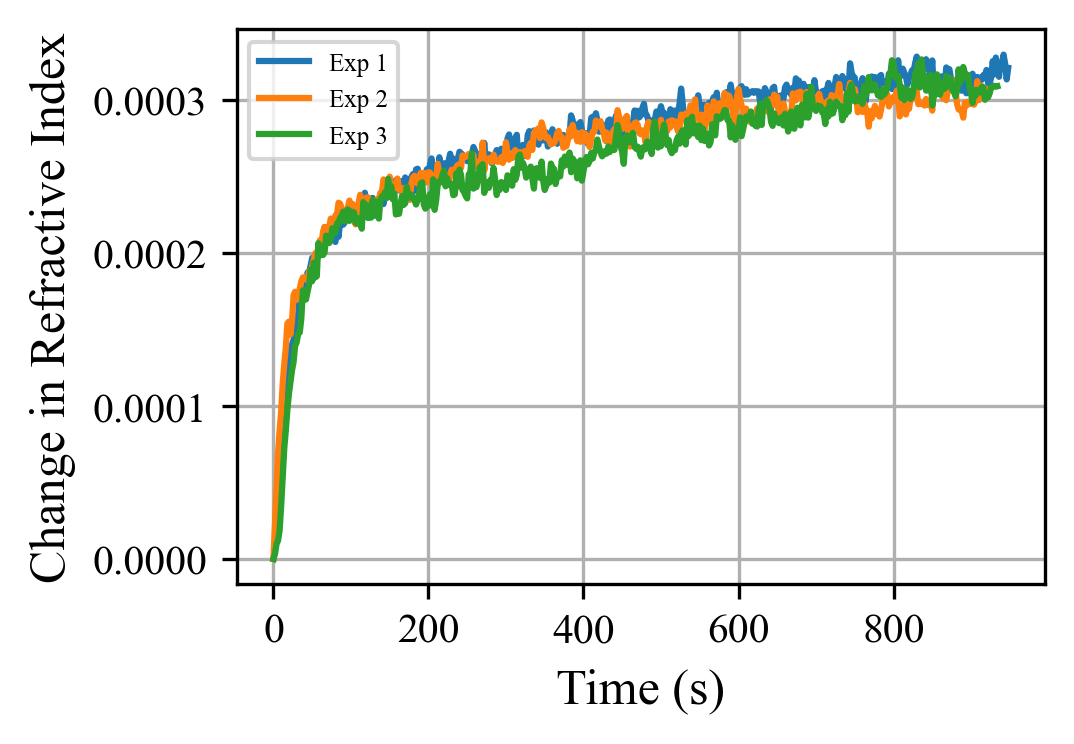

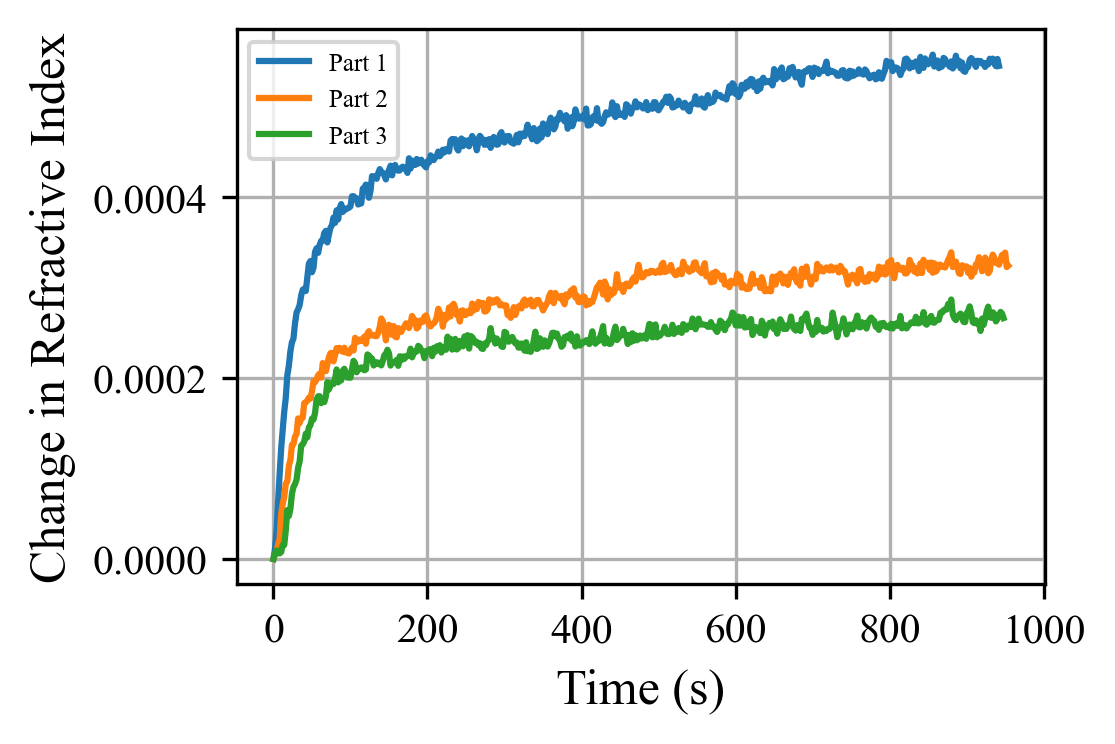

In [90]:
# --- Function to extract a data segment ---
def get_segment(df):
    """Finds and returns the 'biotin' to 'h2o'/'pbs' segment."""
    df['Comment'] = df['Comment'].astype(str).str.lower()
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty: return None
    start_row = start_rows.iloc[0]
    
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h20', na=False)] # 'h20' with a zero
    if end_rows.empty:
        end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]
    if end_rows.empty: return None
    end_row = end_rows.iloc[0]
    
    segment = df[(df['Time'] >= start_row['Time']) & (df['Time'] <= end_row['Time'])].copy()
    segment['Normalized Time'] = segment['Time'] - start_row['Time']
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index
    return segment

# --- Plot 1: Separated Experiments ---
width_cm = 8.83
height_cm = 6.1
fig1, ax1 = plt.subplots(figsize=(width_cm / 2.54, height_cm / 2.54), dpi=300)
# ax1.set_title('Change in Refractive Index from Biotin to H2O/PBS rinse (Separated Experiments)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Change in Refractive Index')

files_only_one = {
    "Exp 1": file_first,
    "Exp 2": file_second,
    "Exp 3": file_third,
}

for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        df['Comment'] = df['Comment'].astype(str).str.lower()
        plot_segment(df, label, ax1)
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")
        
# Finalize Plot 1
ax1.legend()
plt.rc("font", family="times new roman", size=12)
ax1.grid(True)
plt.savefig('BiotinPlots/separated_segments.pdf', bbox_inches='tight')
plt.savefig('BiotinPlots/separated_segments.svg', bbox_inches='tight', transparent=True)

print("\nSuccessfully generated the plot for separated experiments.")

# --- Plot 2: Corrected Experiments ---
width_cm = 8.83
height_cm = 6.1
fig2, ax2 = plt.subplots(figsize=(width_cm / 2.54, height_cm / 2.54), dpi=300)
# ax2.set_title('Change in Refractive Index from Biotin to H2O/PBS rinse (BIG Experiment)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Change in Refractive Index')

try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree['Comment'] = df_tree['Comment'].astype(str).str.lower()
    
    # Split the dataframe by 'biotin' comments
    split_indices = df_tree[df_tree['Comment'].str.contains('biotin', na=False)].index.tolist()
    
    # Create a list of the split dataframes
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        plot_segment(exp_df, f"Part {i}", ax2)
        
except Exception as e:
    print(f"Could not process file {file_tree_corrected}. Error: {e}")

# Finalize Plot 2
ax2.legend()
plt.rc("font", family="times new roman", size=12)
ax2.grid(True)
plt.savefig('BiotinPlots/FULLExp_segments.pdf', bbox_inches='tight')
plt.savefig('BiotinPlots/FULLExp_segments.svg', bbox_inches='tight', transparent=True)


print("\nSuccessfully generated the plot for corrected experiments.")

## 1.3 Biotin + PBS desorption

Processing segment for: Exp_recalib 1
  Found segment from t=486.07 (biotin) to t=1760.05 (H20)
Processing segment for: Exp_recalib 2
  Found segment from t=496.08 (biotin) to t=1740.08 (H20)
Processing segment for: Exp_recalib 3
  Found segment from t=482.06 (biotin) to t=1746.09 (H20)

Successfully generated the plot for separated experiments.
Processing segment for: FULL Exp_part 1
  Found segment from t=500.09 (biotin) to t=1746.09 (H20)
Processing segment for: FULL Exp_part 2
  Found segment from t=2912.05 (biotin) to t=4194.04 (H20)
Processing segment for: FULL Exp_part 3
  Found segment from t=5278.02 (biotin) to t=6568.02 (H20)


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Successfully generated the plot for corrected experiments.


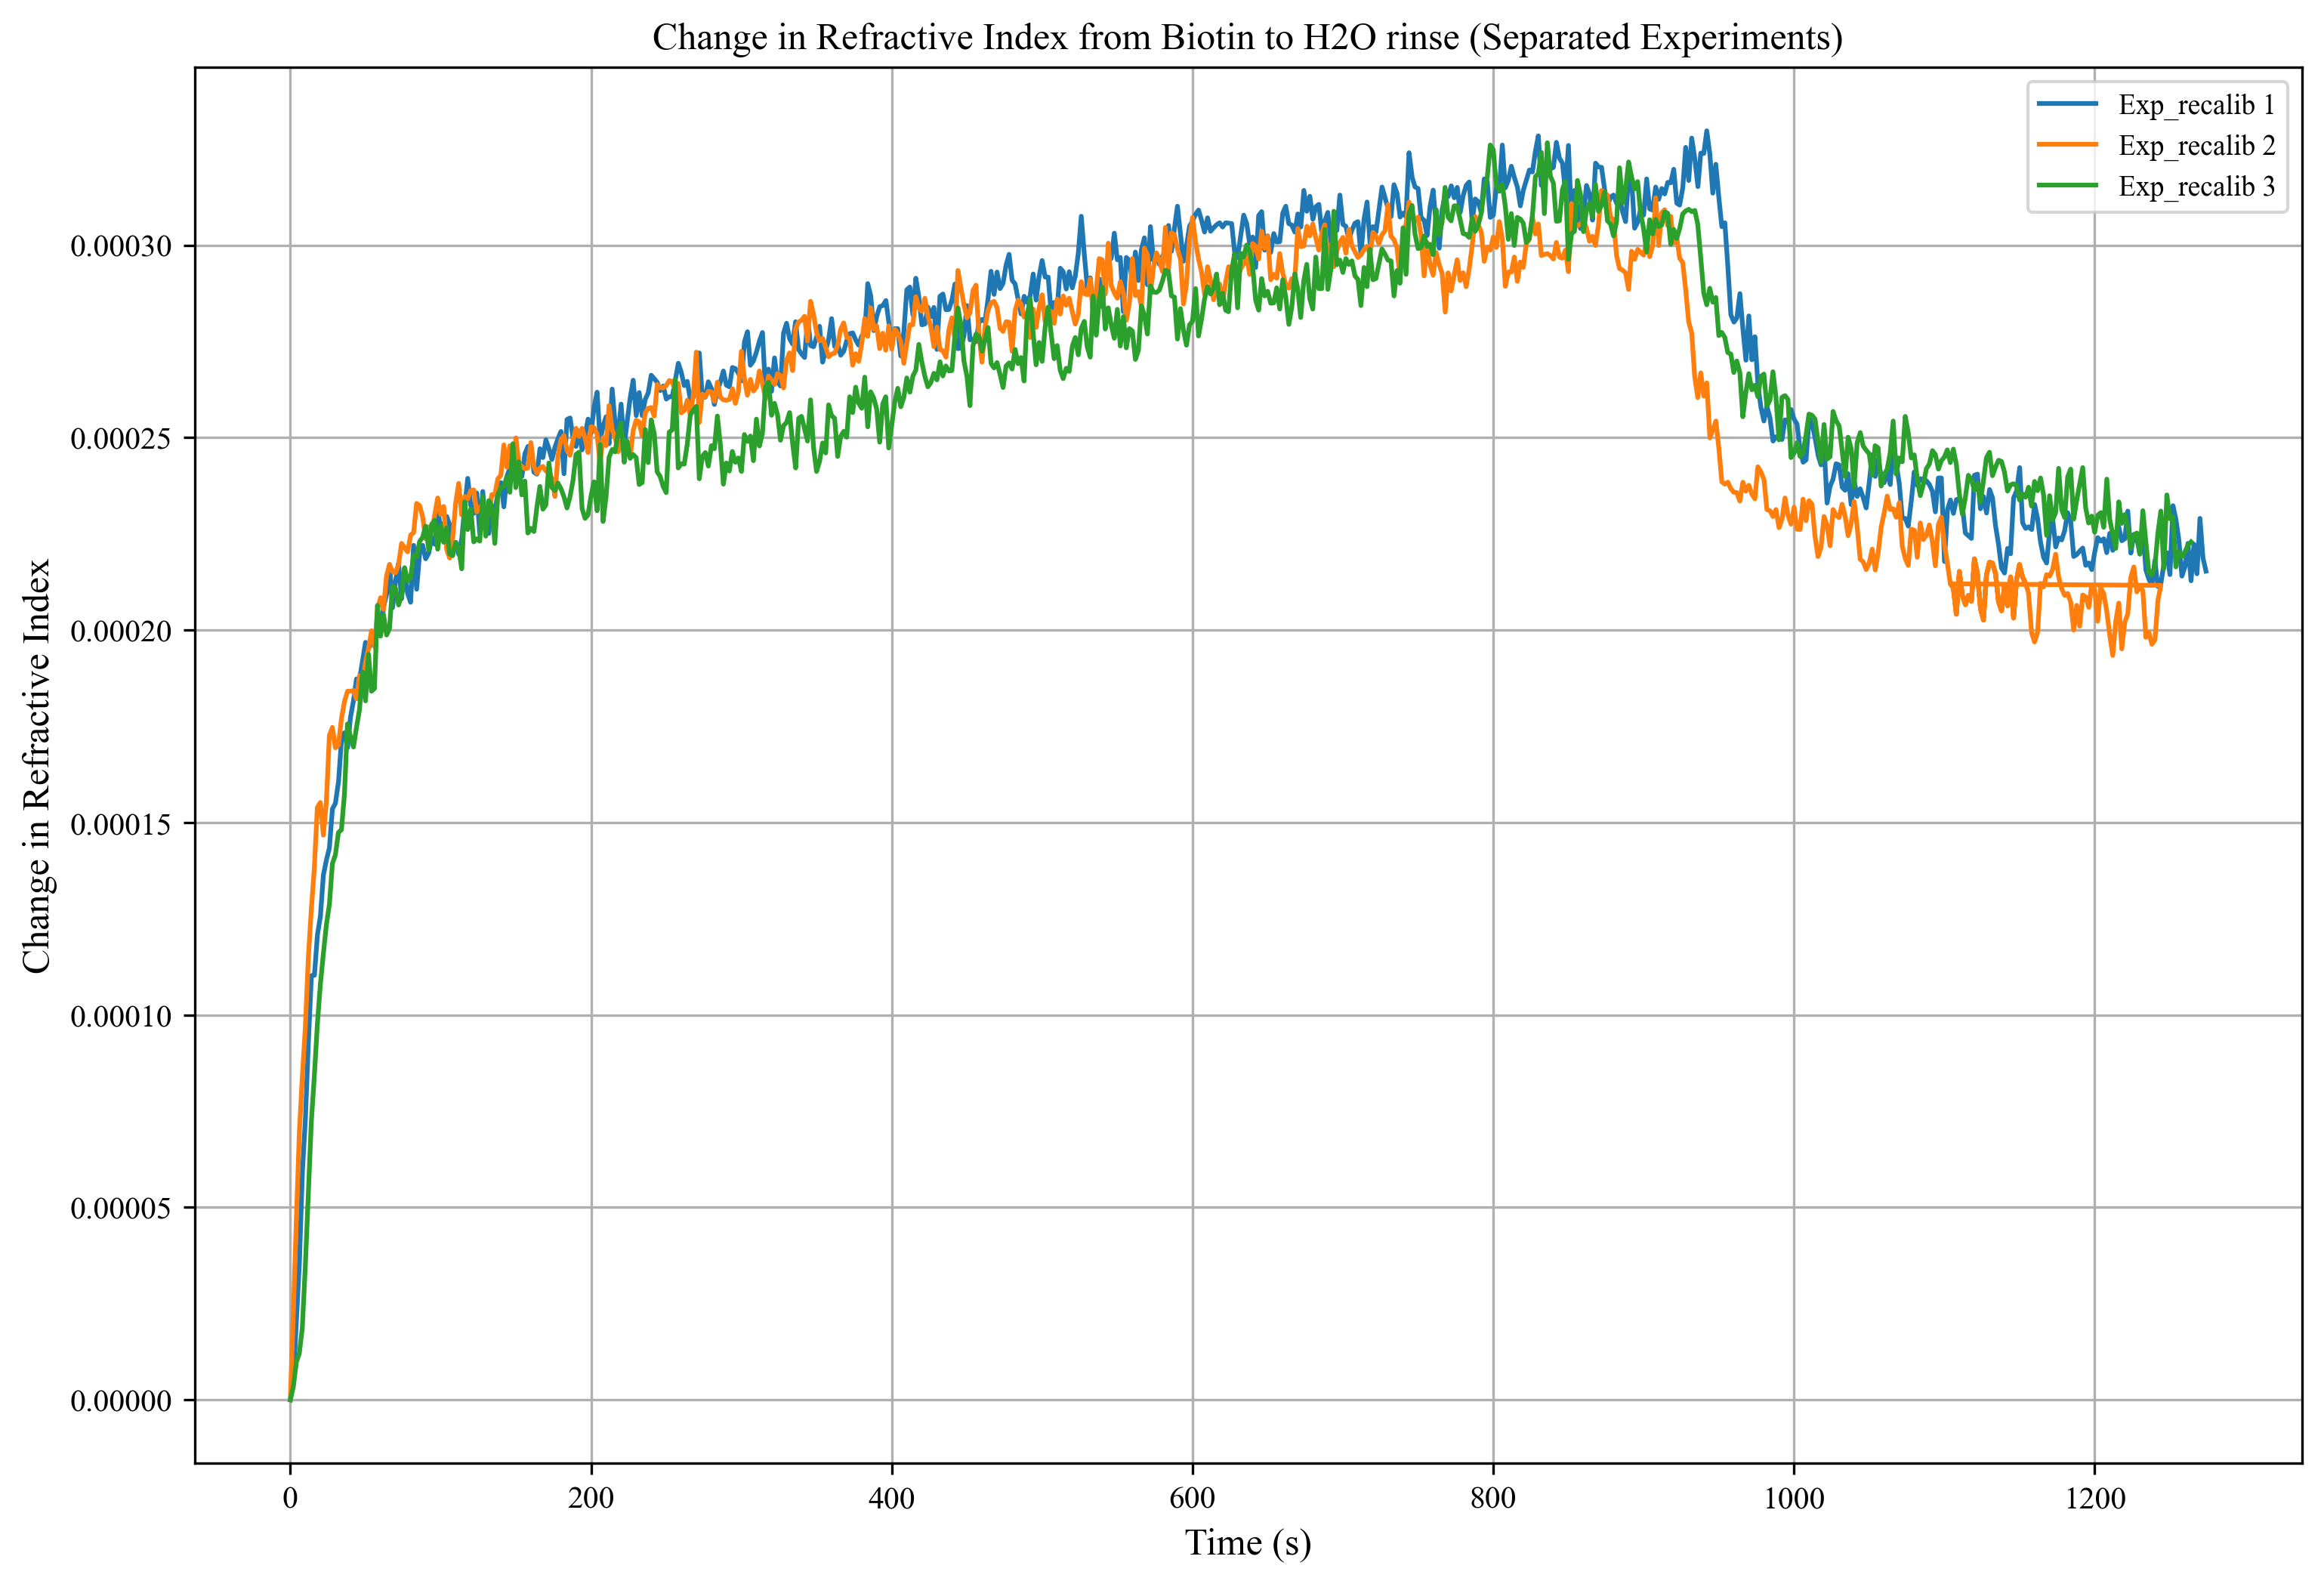

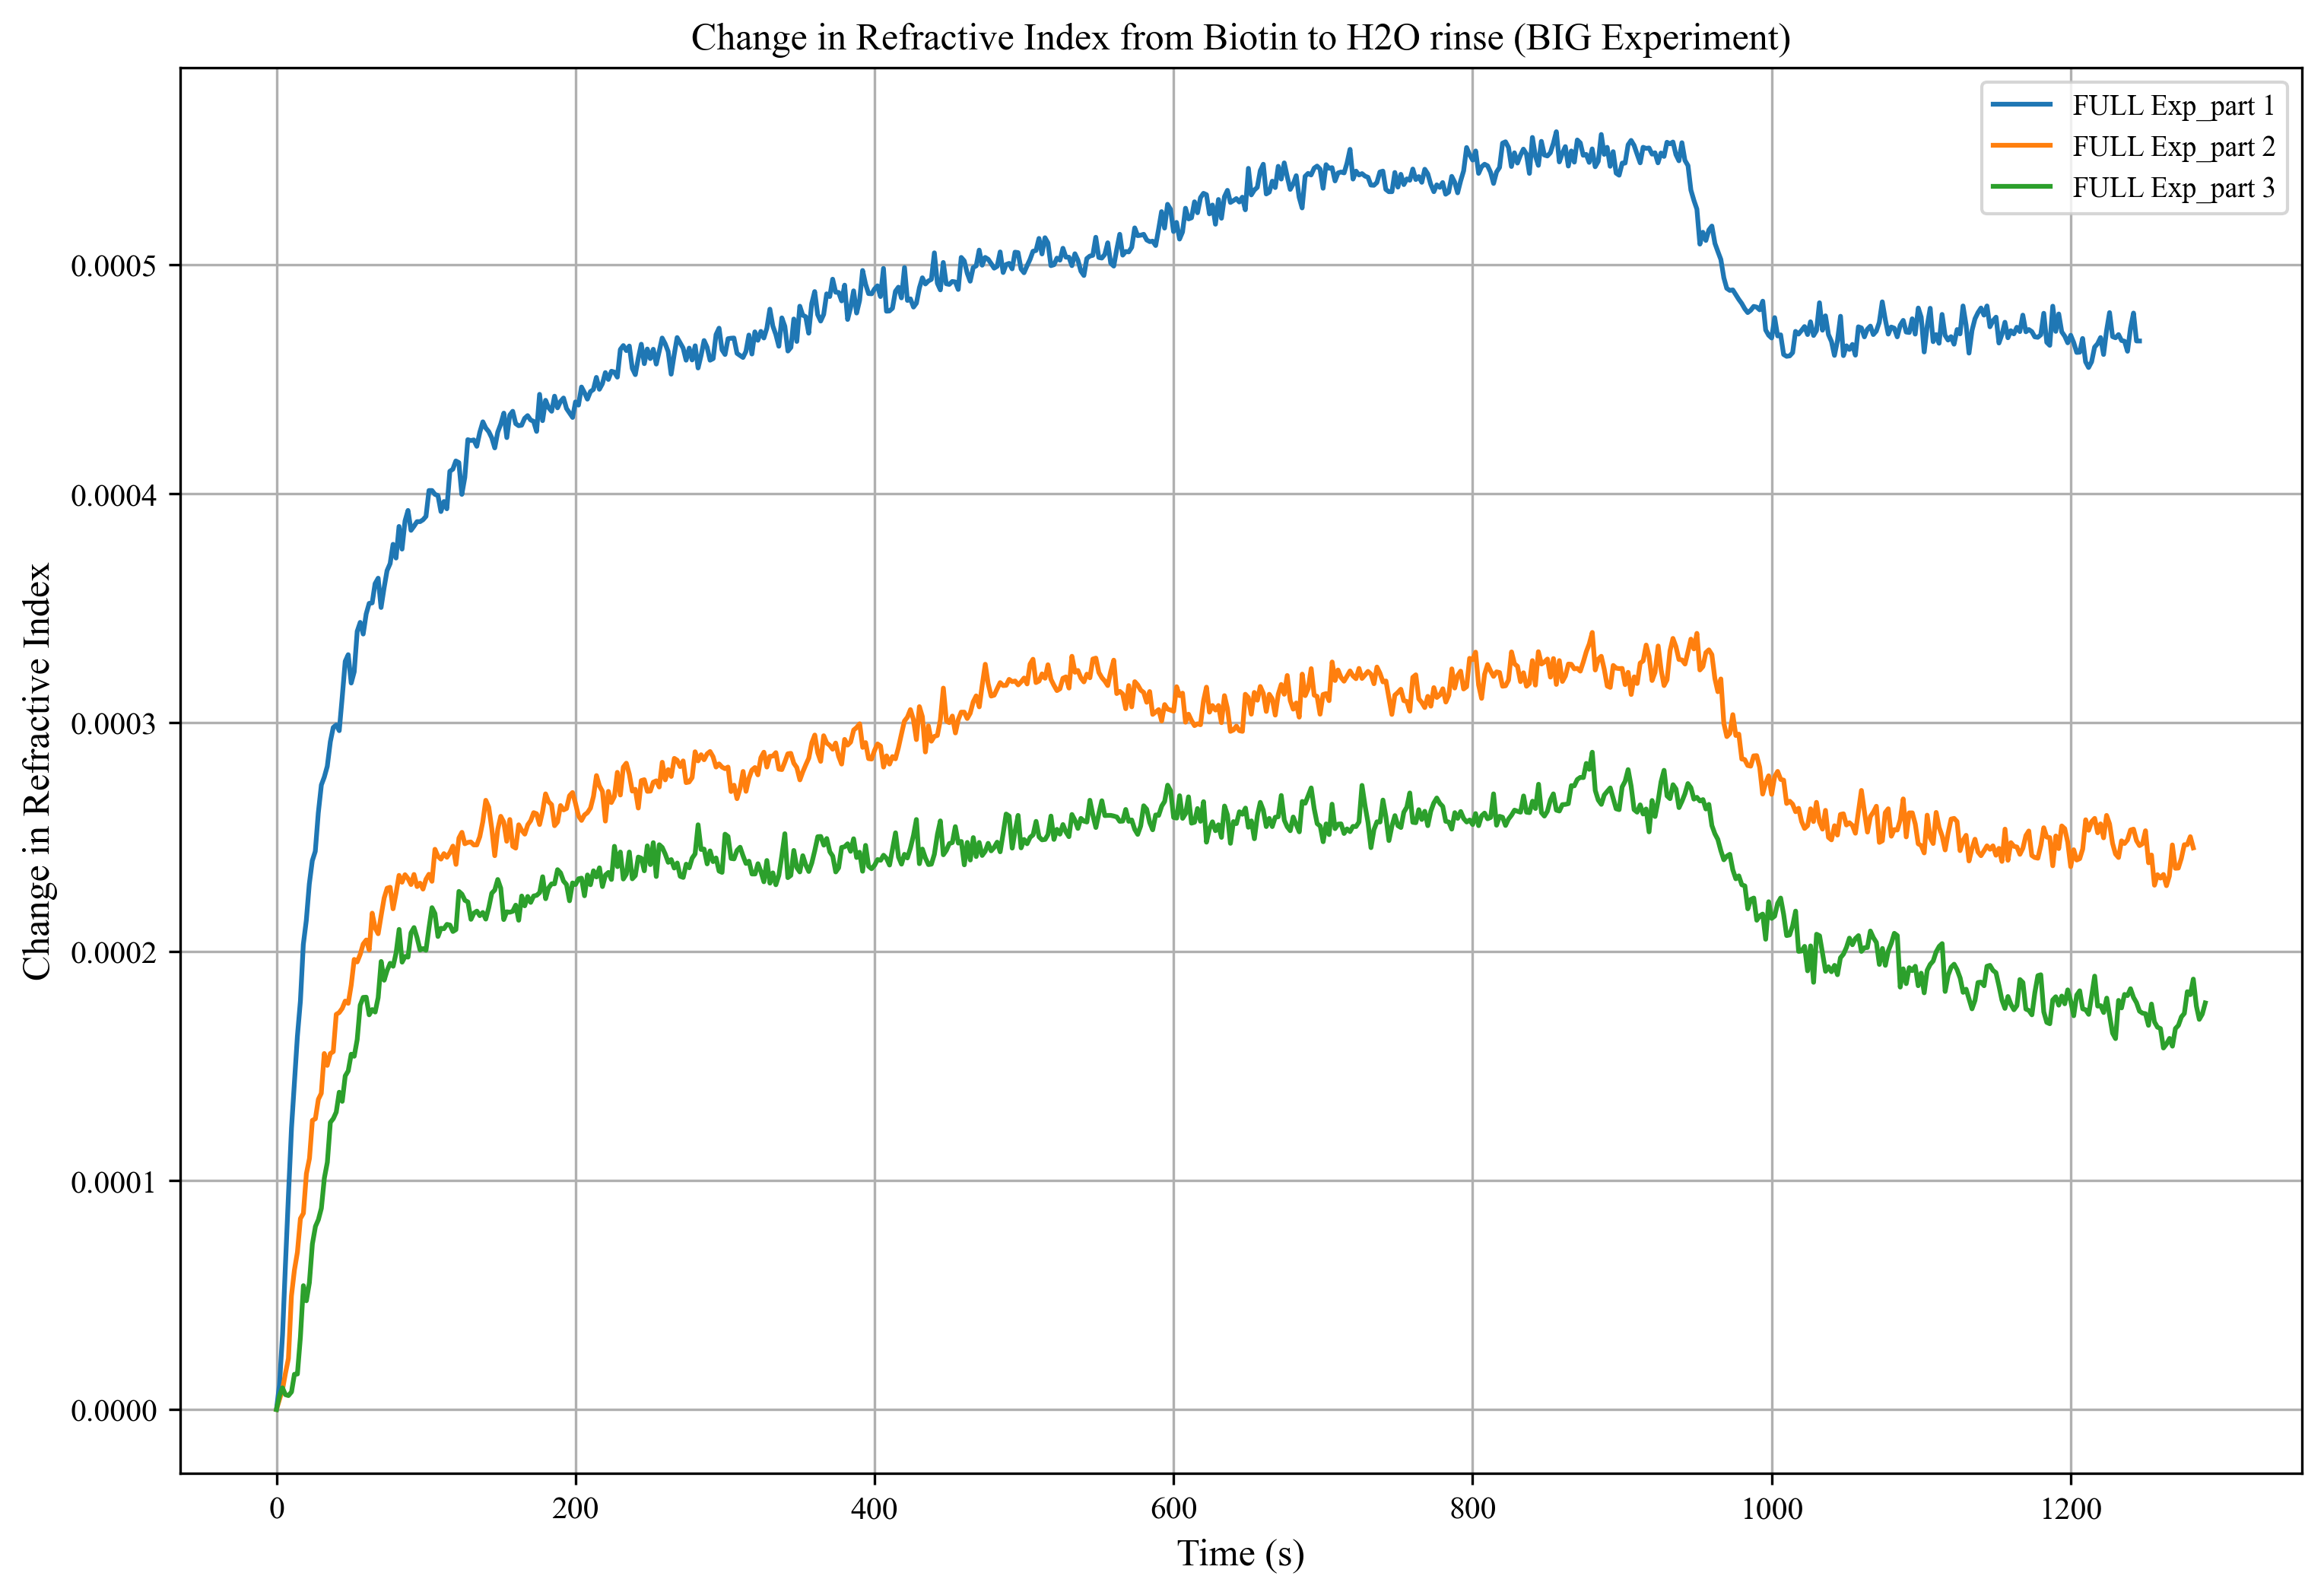

In [55]:
# --- Function to extract and plot a data segment ---
def plot_extended_segment(df, label, ax):
    """
    Finds the segment from 'biotin' to 'h20', normalizes, and plots it.
    """
    print(f"Processing segment for: {label}")
    # Find start row ('biotin')
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty:
        print(f"  --> Biotin comment not found. Skipping.")
        return
    start_row = start_rows.iloc[0]

    # Find end row ('h20') that occurs AFTER the start row
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h20', na=False)]
    if end_rows.empty:
        print(f"  --> H20 comment not found after biotin. Skipping.")
        return
    end_row = end_rows.iloc[0]

    start_time = start_row['Time']
    end_time = end_row['Time']
    print(f"  Found segment from t={start_time:.2f} (biotin) to t={end_time:.2f} (H20)")

    # Slice the dataframe
    segment = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)].copy()
    if segment.empty:
        print(f"  --> Segment is empty. Skipping.")
        return

    # Normalize time and refractive index
    segment['Normalized Time'] = segment['Time'] - start_time
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index

    # Plot the segment
    ax.plot(segment['Normalized Time'], segment['Normalized Refractive Index'], label=label)

# --- Plot 1: Separated Experiments ---
fig1, ax1 = plt.subplots(figsize=(12, 8), dpi=300)
ax1.set_title('Change in Refractive Index from Biotin to H2O rinse (Separated Experiments)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Change in Refractive Index')

files_only_one = {
    "Exp_recalib 1": file_first,
    "Exp_recalib 2": file_second,
    "Exp_recalib 3": file_third,
}

for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        df['Comment'] = df['Comment'].astype(str).str.lower()
        plot_extended_segment(df, label, ax1)
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# Finalize Plot 1
ax1.legend()
plt.rc("font", family="times new roman", size=12)
ax1.grid(True)
plt.savefig('BiotinPlots/separated_segments_extended.pdf', bbox_inches='tight')

print("\nSuccessfully generated the plot for separated experiments.")

# --- Plot 2: Corrected Experiments ---
fig2, ax2 = plt.subplots(figsize=(12, 8), dpi=300)
ax2.set_title('Change in Refractive Index from Biotin to H2O rinse (BIG Experiment)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Change in Refractive Index')

try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree['Comment'] = df_tree['Comment'].astype(str).str.lower()
    
    # Split the dataframe by 'biotin' comments
    split_indices = df_tree[df_tree['Comment'].str.contains('biotin', na=False)].index.tolist()
    
    # Create a list of the split dataframes
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        plot_extended_segment(exp_df.copy(), f"FULL Exp_part {i}", ax2)
        
except Exception as e:
    print(f"Could not process file {file_tree_corrected}. Error: {e}")

# Finalize Plot 2
ax2.legend()
plt.rc("font", family="times new roman", size=12)
ax2.grid(True)
plt.savefig('BiotinPlots/FULLExp_segments_extended.pdf', bbox_inches='tight')

print("\nSuccessfully generated the plot for corrected experiments.")

## 1.4 Numerical Analysis


--- Correlation Matrix for: Separated Experiments ---
          Exp 1     Exp 2     Exp 3
Exp 1  1.000000  0.958011  0.962895
Exp 2  0.958011  1.000000  0.912860
Exp 3  0.962895  0.912860  1.000000
Heatmap saved to BiotinPlots/correlation_separated.pdf

--- Correlation Matrix for: FULL Experiment ---
           Exp_part1  Exp_part2  Exp_part3
Exp_part1   1.000000   0.953382   0.881340
Exp_part2   0.953382   1.000000   0.957076
Exp_part3   0.881340   0.957076   1.000000
Heatmap saved to BiotinPlots/correlation_FULL.pdf


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


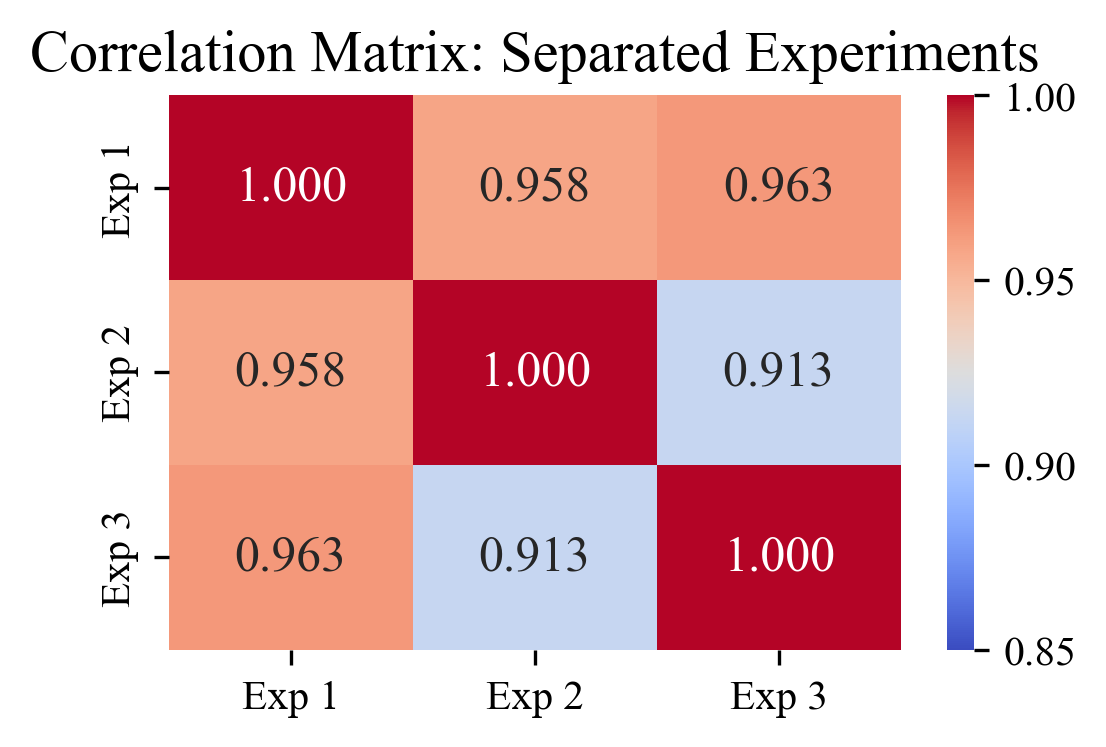

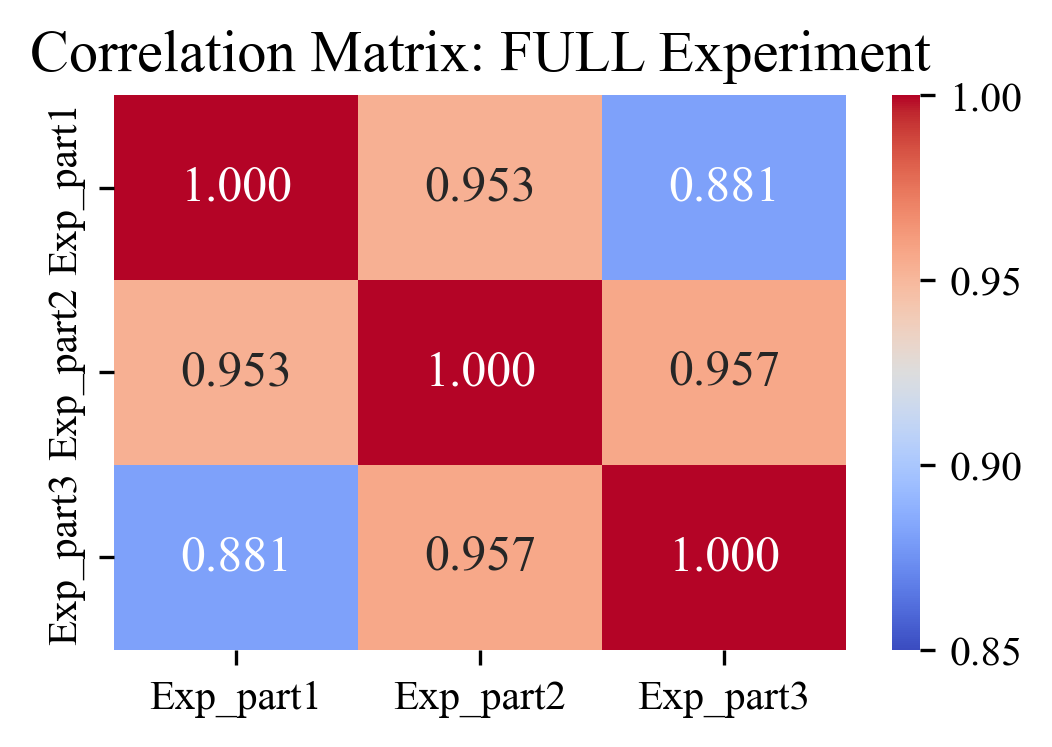

In [26]:
# --- Function to extract a data segment ---
def get_segment(df):
    """Finds and returns the 'biotin' to 'h2o'/'pbs' segment."""
    df['Comment'] = df['Comment'].astype(str).str.lower()
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty: return None
    start_row = start_rows.iloc[0]
    
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h20', na=False)] # 'h20' with a zero
    if end_rows.empty:
        end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]
    if end_rows.empty: return None
    end_row = end_rows.iloc[0]
    
    segment = df[(df['Time'] >= start_row['Time']) & (df['Time'] <= end_row['Time'])].copy()
    segment['Normalized Time'] = segment['Time'] - start_row['Time']
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index
    return segment

# --- Function to perform correlation analysis on a set of segments ---
def analyze_correlation(segments_dict, title, output_filename):
    """Interpolates segments, calculates correlation, and plots a heatmap."""
    # Find the minimum duration to create a common time axis
    min_duration = min(seg['Normalized Time'].max() for seg in segments_dict.values())
    common_time = np.linspace(0, min_duration, num=500)
    
    interpolated_data = {}
    for label, segment in segments_dict.items():
        # Interpolate each segment onto the common time axis
        interpolated_values = np.interp(common_time, segment['Normalized Time'], segment['Normalized Refractive Index'])
        interpolated_data[label] = interpolated_values
        
    # Create a DataFrame and calculate correlation
    df_interp = pd.DataFrame(interpolated_data)
    correlation_matrix = df_interp.corr()
    
    print(f"\n--- Correlation Matrix for: {title} ---")
    print(correlation_matrix)
    
    # Plot heatmap
    width_cm = 10
    height_cm = 6.1
    plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54),dpi = 300)
    sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=0.85, vmax=1.0,)
    plt.title(f'Correlation Matrix: {title}')
    plt.savefig(output_filename, bbox_inches='tight', transparent=True)
    print(f"Heatmap saved to {output_filename}")

# --- Main script ---

# 1. Process Separated Experiments
files_only_one = {"Exp 1": file_first, "Exp 2": file_second, "Exp 3": file_third}
separated_segments = {}
for label, path in files_only_one.items():
    df = pd.read_csv(path, sep=';', on_bad_lines='skip')
    df.columns = [col.strip() for col in df.columns]
    for col in ['Time', 'Refractive Index']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    segment = get_segment(df)
    if segment is not None:
        separated_segments[label] = segment

if len(separated_segments) > 1:
    analyze_correlation(separated_segments, 'Separated Experiments', 'BiotinPlots/correlation_separated.pdf')

# 2. Process Corrected Experiments
corrected_segments = {}
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree['Comment'] = df_tree['Comment'].astype(str).str.lower()
    
    split_indices = df_tree[df_tree['Comment'].str.contains('biotin', na=False)].index.tolist()
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        label = f"Exp_part{i}"
        segment = get_segment(exp_df.copy()) # Pass a copy to avoid SettingWithCopyWarning
        if segment is not None:
            corrected_segments[label] = segment
            
    if len(corrected_segments) > 1:
        analyze_correlation(corrected_segments, 'FULL Experiment', 'BiotinPlots/correlation_FULL.pdf')
except Exception as e:
    print(f"Could not process corrected experiments. Error: {e}")

c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



--- Correlation Matrix for: All 6 Experiments ---
           Exp 1     Exp 2     Exp 3    Part 1    Part 2    Part 3
Exp 1   1.000000  0.958011  0.962895  0.927062  0.967393  0.956768
Exp 2   0.958011  1.000000  0.912860  0.855049  0.916758  0.933183
Exp 3   0.962895  0.912860  1.000000  0.965792  0.961189  0.926716
Part 1  0.927062  0.855049  0.965792  1.000000  0.953769  0.882935
Part 2  0.967393  0.916758  0.961189  0.953769  1.000000  0.957387
Part 3  0.956768  0.933183  0.926716  0.882935  0.957387  1.000000
Heatmap saved to BiotinPlots/correlation_all_6_experiments.svg


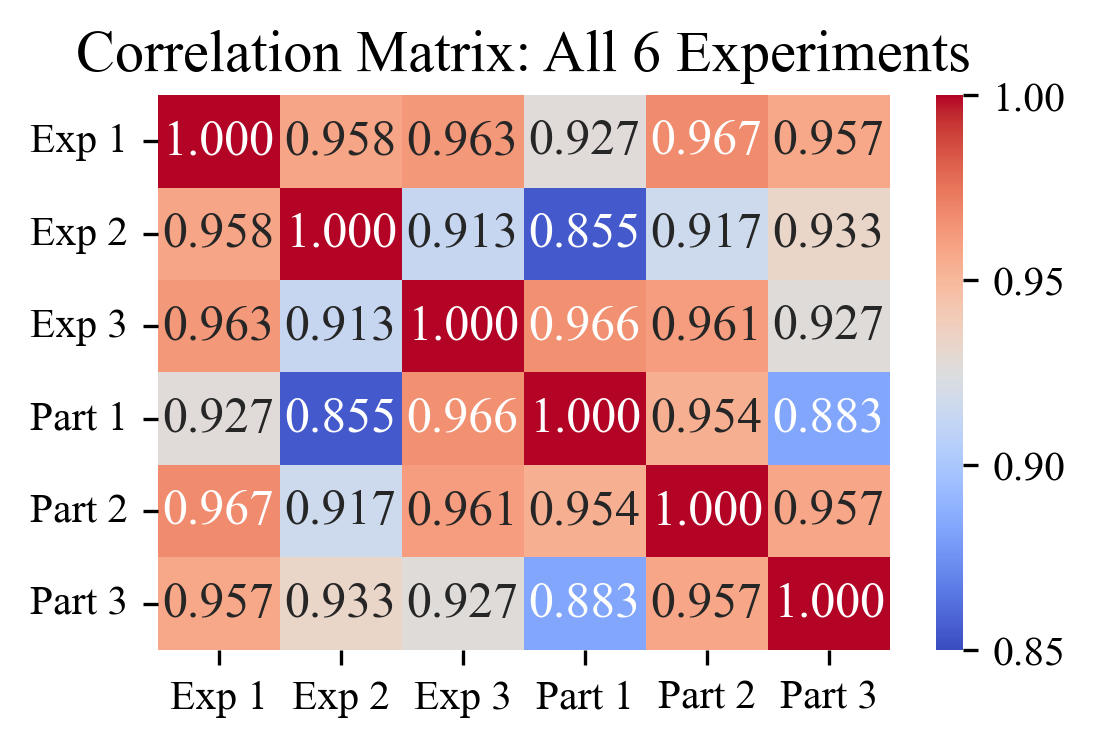

In [27]:
# Create a dictionary to hold all 6 segments
all_segments = {}

# 1. Process Separated Experiments
files_only_one = {"Exp 1": file_first, "Exp 2": file_second, "Exp 3": file_third}
for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        segment = get_segment(df)
        if segment is not None:
            all_segments[label] = segment
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# 2. Process Corrected Experiments
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    
    split_indices = df_tree[df_tree['Comment'].str.lower().str.contains('biotin', na=False)].index.tolist()
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        label = f"Part {i}"
        segment = get_segment(exp_df.copy())
        if segment is not None:
            all_segments[label] = segment
except Exception as e:
    print(f"Could not process corrected experiments. Error: {e}")

# 3. Run combined analysis
analyze_correlation(all_segments, 'All 6 Experiments', 'BiotinPlots/correlation_all_6_experiments.svg')

min_duration = min(seg['Normalized Time'].max() for seg in all_segments.values())
common_time = np.linspace(0, min_duration, num=500)

interpolated_data = {}
for label, segment in all_segments.items():
    # Interpolate each segment onto the common time axis
    interpolated_values = np.interp(common_time, segment['Normalized Time'], segment['Normalized Refractive Index'])
    interpolated_data[label] = interpolated_values
    
# Create a DataFrame and calculate correlation
df_interp = pd.DataFrame(interpolated_data)
correlation_matrix = df_interp.corr()

--- Feature Table ---
| Experiment   |   Max Signal |   Mean Signal |   Signal Std Dev |   Area Under Curve |
|:-------------|-------------:|--------------:|-----------------:|-------------------:|
| Exp 1        |    0.0003297 |   0.000264907 |      4.60432e-05 |           0.337799 |
| Exp 2        |    0.0003142 |   0.000257068 |      4.2361e-05  |           0.3201   |
| Exp 3        |    0.0003266 |   0.000256913 |      4.40632e-05 |           0.325044 |
| Part 1       |    0.0005581 |   0.00047649  |      7.36357e-05 |           0.594194 |
| Part 2       |    0.0003394 |   0.000277674 |      4.86183e-05 |           0.356281 |
| Part 3       |    0.0002871 |   0.000225247 |      4.50834e-05 |           0.290839 |

PCA plot saved to pca_classification.png


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


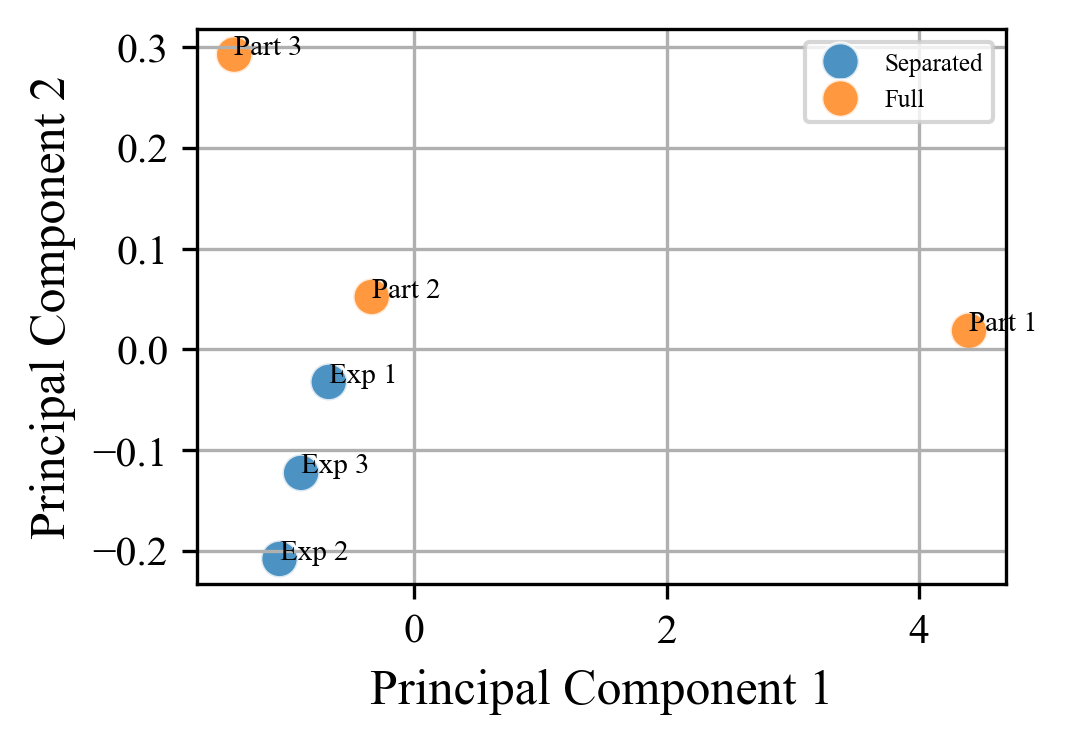

In [32]:
# --- Main script ---

# Create a list to hold the features for each experiment
feature_list = []
all_segments = {}

# 1. Process Separated Experiments
files_only_one = {"Exp 1": file_first, "Exp 2": file_second, "Exp 3": file_third}
for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        segment = get_segment(df)
        if segment is not None:
            all_segments[label] = segment
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# 2. Process Corrected Experiments
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    
    split_indices = df_tree[df_tree['Comment'].str.lower().str.contains('biotin', na=False)].index.tolist()
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        label = f"Part {i}"
        segment = get_segment(exp_df.copy())
        if segment is not None:
            all_segments[label] = segment
except Exception as e:
    print(f"Could not process corrected experiments. Error: {e}")

# 3. Extract Features and create a feature table
for label, segment in all_segments.items():
    # --- FIX IS HERE ---
    # Sort by time to ensure x-values are monotonic before calculating AUC
    segment = segment.sort_values(by='Normalized Time').drop_duplicates(subset=['Normalized Time'])
    
    features = {
        'Experiment': label,
        'Max Signal': segment['Normalized Refractive Index'].max(),
        'Mean Signal': segment['Normalized Refractive Index'].mean(),
        'Signal Std Dev': segment['Normalized Refractive Index'].std(),
        'Area Under Curve': auc(segment['Normalized Time'], segment['Normalized Refractive Index'])
    }
    feature_list.append(features)

feature_df = pd.DataFrame(feature_list)
print("--- Feature Table ---")
print(feature_df.to_markdown(index=False))

# 4. Perform PCA
# Separate features and labels
features_for_pca = feature_df.drop('Experiment', axis=1)
labels = feature_df['Experiment']

# Standardize the features
x = StandardScaler().fit_transform(features_for_pca)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, labels], axis=1)

# Add a 'Group' column for coloring the plot
final_df['Group'] = final_df['Experiment'].apply(lambda x: 'Full' if 'Part' in x else 'Separated')

# 5. Visualize PCA results
width_cm = 8.83
height_cm = 6.1
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54),dpi=300)
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Group', data=final_df, s=80, alpha=0.8)

# Add labels to each point
for i, txt in enumerate(final_df.Experiment):
    plt.text(final_df['Principal Component 1'][i], final_df['Principal Component 2'][i], txt, fontsize=7)

# plt.title('2D PCA of Experiment Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize = 6)
plt.grid(True)
plt.savefig('BiotinPlots/pca_classification.svg', bbox_inches='tight', transparent=True)

print("\nPCA plot saved to pca_classification.png")


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


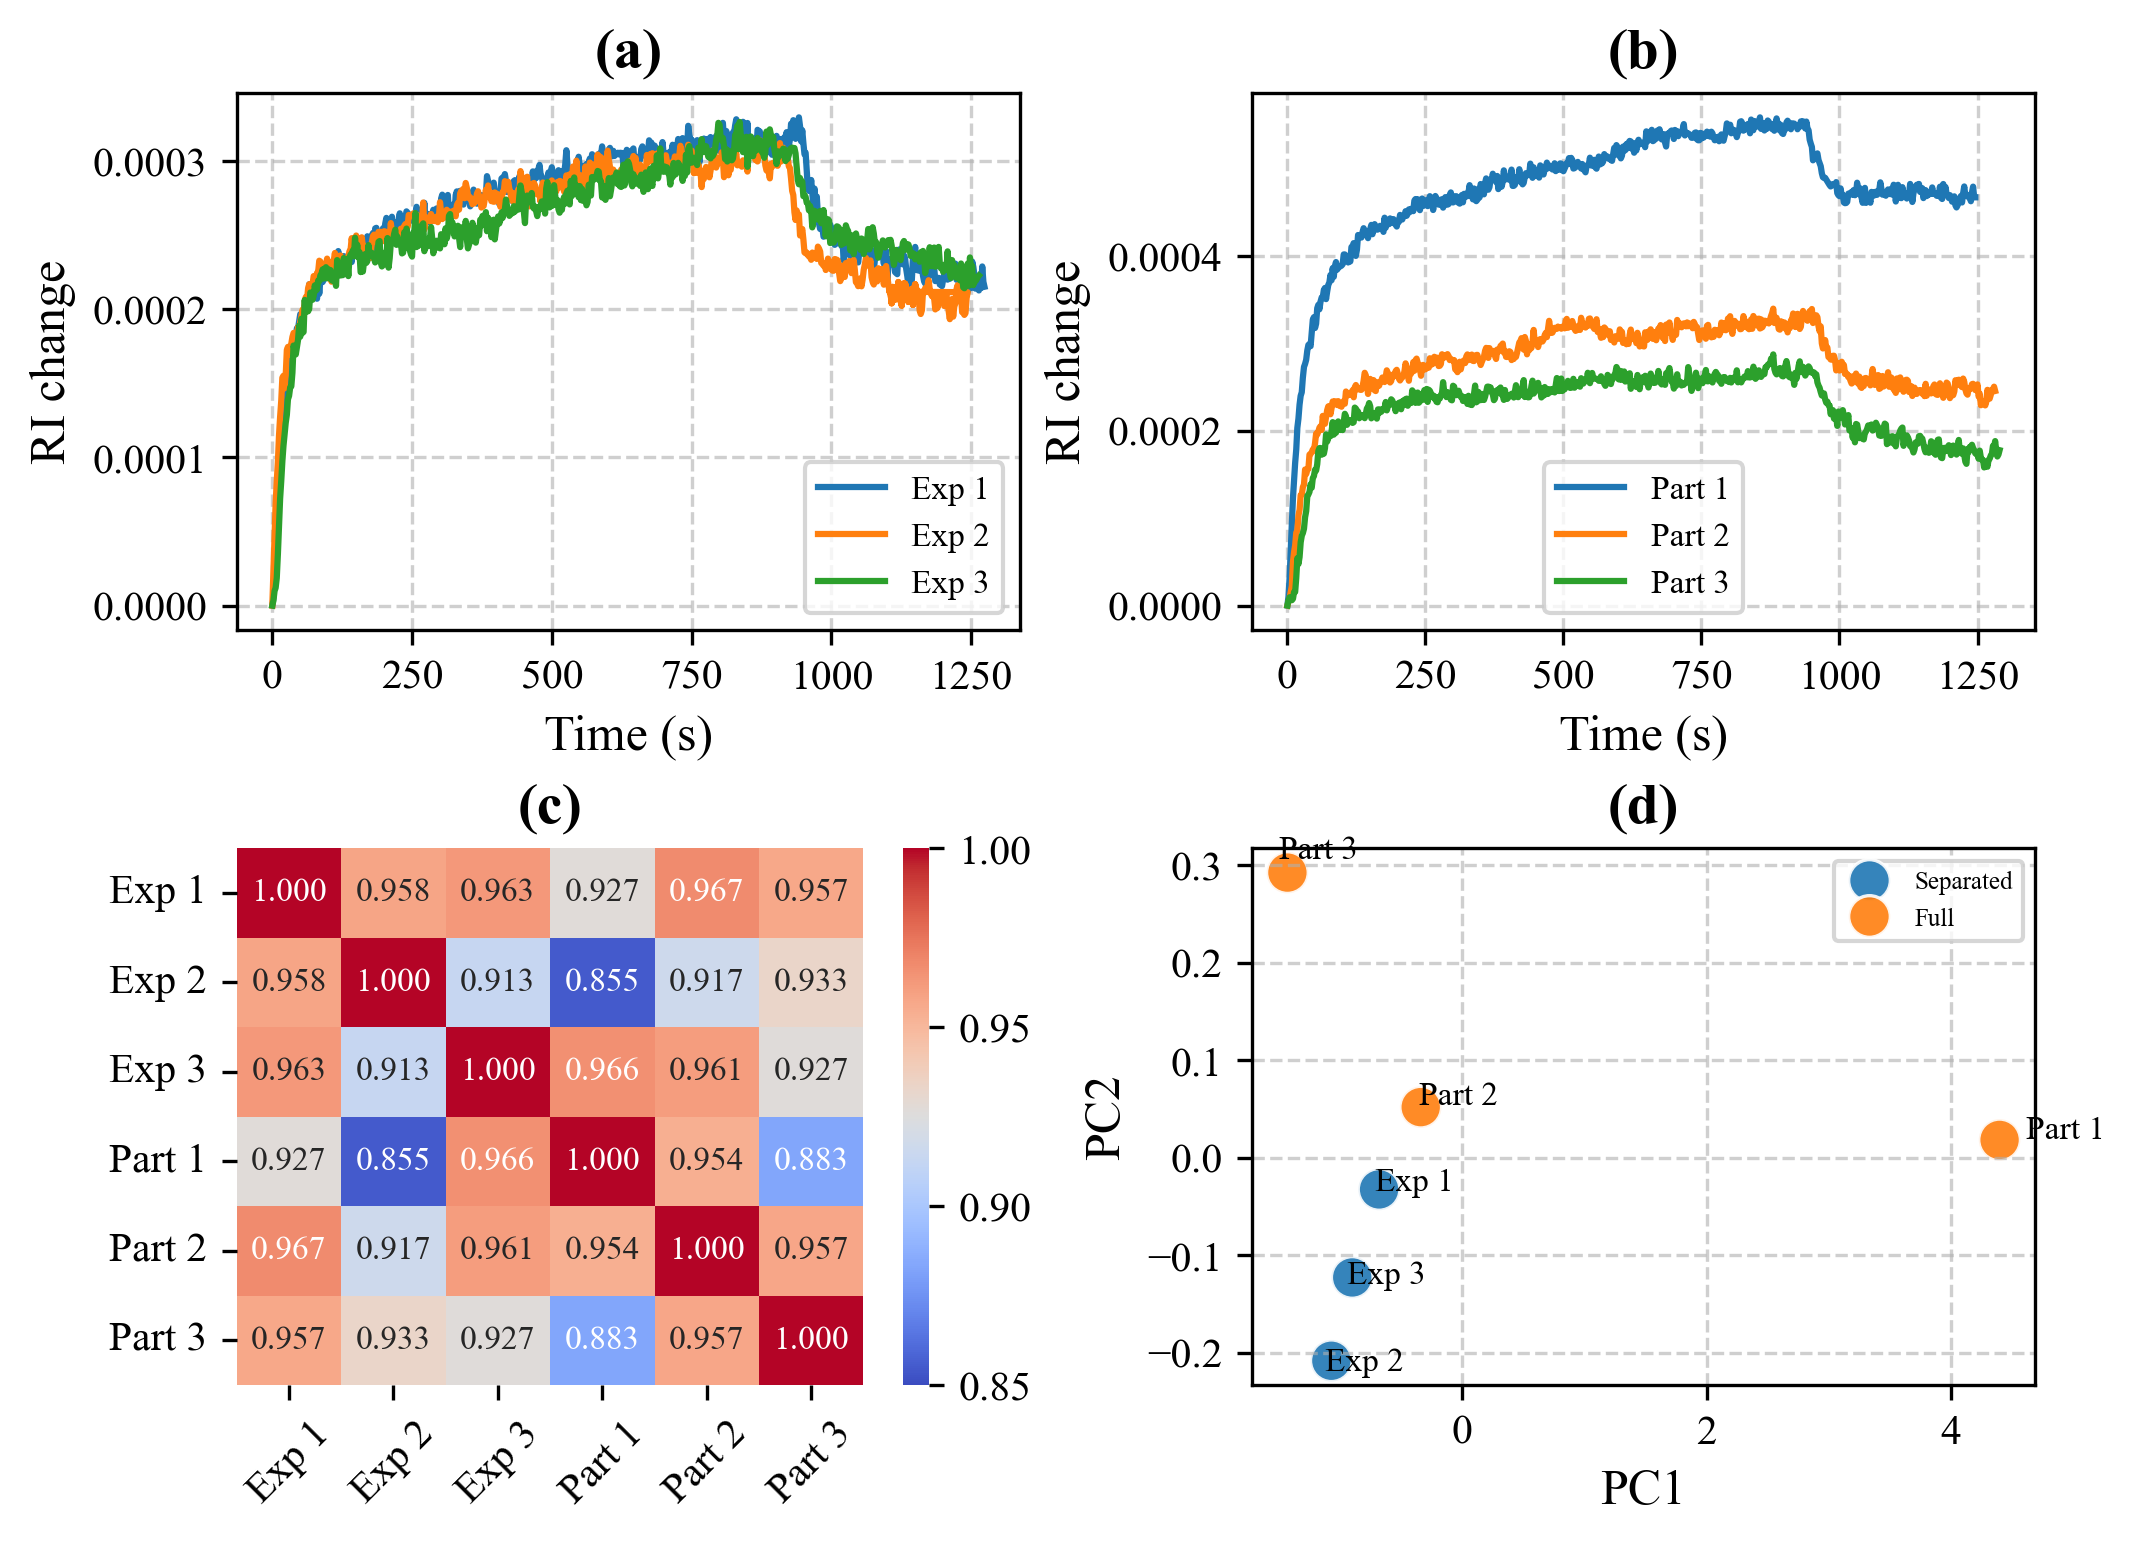


Successfully generated the integrated 2x2 analysis figure.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import auc
import os

# --- Setup and Configuration ---
output_dir = 'BiotinPlots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# File paths
file_first = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_biotin (FIRST).csv'
file_second = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_biotin (SECOND).csv'
file_third = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_BIOTIN (THIRD).csv'
file_tree_corrected = 'Data/Data_biotin/RODRIGO 06-08_BIOTIN_tree_corrected.csv'

# Configure plot aesthetics
plt.rc("font", family="Times New Roman", size=12)
plt.rc("axes", titlesize=14, labelsize=12)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
plt.rc("legend", fontsize=8)

# --- Helper Functions ---

try:
    # --- 1. Load and Clean Data ---
    df1 = pd.read_csv(file_first, sep=';', on_bad_lines='skip')
    df2 = pd.read_csv(file_second, sep=';', on_bad_lines='skip')
    df3 = pd.read_csv(file_third, sep=';', on_bad_lines='skip')
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')

    dataframes = [df1, df2, df3, df_tree]
    for df in dataframes:
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)

    # --- 2. Setup the 2x2 Figure ---
    fig, axes = plt.subplots(2, 2, figsize=(18 / 2.54, 13 / 2.54), dpi=300)

    # --- 3. Generate Subplot (a): Separated Experiment Segments ---
    ax_a = axes[0, 0]
    files_only_one = {"Exp 1": df1, "Exp 2": df2, "Exp 3": df3}
    for label, df_in in files_only_one.items():
        plot_segment(df_in, label, ax_a)
    ax_a.set_title('(a)', weight='bold')
    ax_a.set_xlabel('Time (s)')
    ax_a.set_ylabel('RI change')
    ax_a.legend()
    ax_a.grid(True, linestyle='--', alpha=0.6)

    # --- 4. Generate Subplot (b): Single Experiment Segments ---
    ax_b = axes[0, 1]
    split_indices = df_tree[df_tree['Comment'].str.lower().str.contains('biotin', na=False)].index.tolist()
    experiment_dfs = np.split(df_tree, split_indices[1:])
    for i, exp_df in enumerate(experiment_dfs, 1):
        plot_segment(exp_df, f"Part {i}", ax_b)
    ax_b.set_title('(b)', weight='bold')
    ax_b.set_xlabel('Time (s)')
    ax_b.set_ylabel('RI change')
    ax_b.legend()
    ax_b.grid(True, linestyle='--', alpha=0.6)

    # --- 5. Generate Subplot (c): Correlation Matrix (YOUR EXACT LOGIC) ---
    ax_c = axes[1, 0]
    
    # Plotting for correlation
    sns.heatmap(correlation_matrix, ax=ax_c, annot=True, fmt=".3f", cmap='coolwarm', vmin=0.85, vmax=1.0, annot_kws={"size": 8})
    ax_c.set_title('(c)', weight='bold')
    ax_c.tick_params(axis='x', rotation=45)
    ax_c.tick_params(axis='y', rotation=0)

    # --- 6. Generate Subplot (d): PCA (YOUR EXACT LOGIC) ---
    ax_d = axes[1, 1]
    # Plotting for PCA
    
    sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Group', data=final_df, s=100, alpha=0.9, ax=ax_d)
    for i, txt in enumerate(final_df.Experiment):
        ax_d.text(final_df['Principal Component 1'][i] * 1.05, final_df['Principal Component 2'][i] * 1.05, txt, fontsize=8)

    ax_d.set_title('(d)', weight='bold')
    ax_d.set_xlabel('PC1')
    ax_d.set_ylabel('PC2')
    ax_d.legend(fontsize = 6)
    ax_d.grid(True, linestyle='--', alpha=0.6)

    # --- 7. Finalize and Save ---
    plt.tight_layout(pad=0.5)
    plt.savefig(os.path.join(output_dir, 'final_analysis_figure_INTEGRATED.pdf'))
    plt.savefig(os.path.join(output_dir, 'final_analysis_figure_INTEGRATED.svg'), transparent=True)
    plt.show()

    print(f"\nSuccessfully generated the integrated 2x2 analysis figure.")

except FileNotFoundError as e:
    print(f"Error: Could not find a data file. Please check path: {e.filename}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# 2. Analysis for 3.74mg BIOTIN concentration

## 2.1 Full Experiment View

<Figure size 347.638x240.157 with 0 Axes>

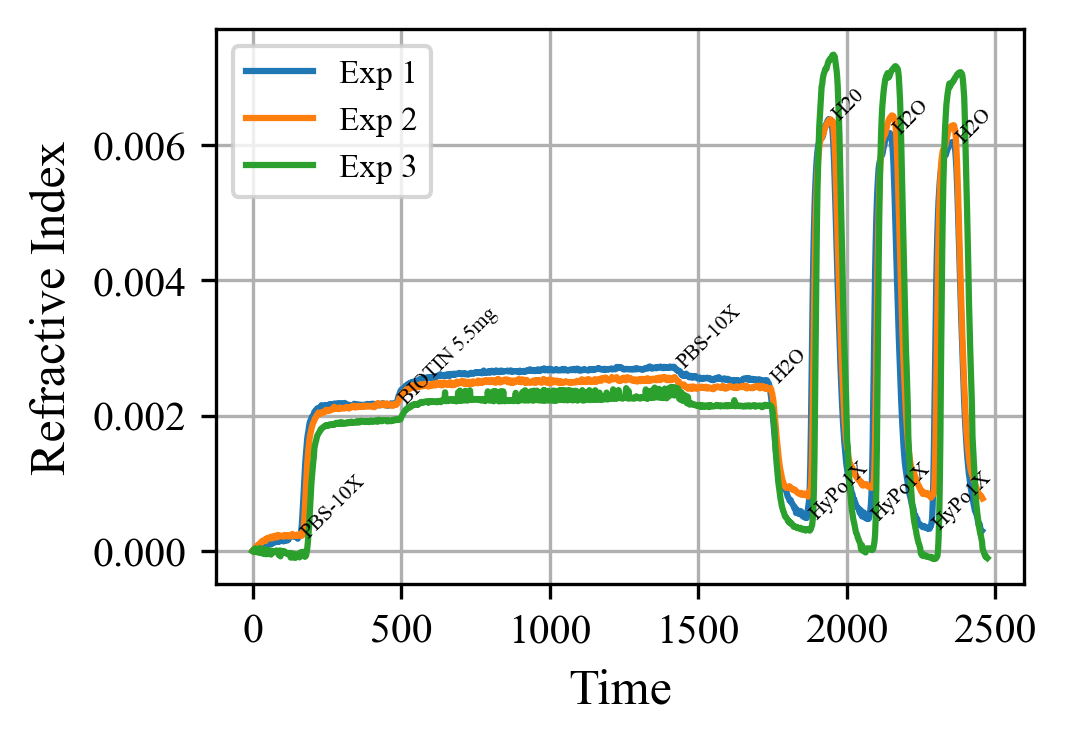

In [41]:
# File paths
file_first5_5mg = 'Data/Data_biotin/Biotin5_5mgFIRST_11_08_25_RODRIGO.csv'
file_second5_5mg = 'Data/Data_biotin/Biotin5_5mgSECOND_11_08_25_RODRIGO.csv'
file_third5_5mg = 'Data/Data_biotin/Biotin5_5mgTHIRD_11_08_25_RODRIGO.csv'

width_cm = 8.83
height_cm = 6.1
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54))
# Let's try to read the files with error handling
try:
    df1 = pd.read_csv(file_first5_5mg, sep=';', on_bad_lines='skip')
    df2 = pd.read_csv(file_second5_5mg, sep=';', on_bad_lines='skip')
    # The error was in the third file, so let's pay special attention to it.
    df3 = pd.read_csv(file_third5_5mg, sep=';', on_bad_lines='skip')

    # Clean up column names by stripping whitespace
    df1.columns = [col.strip() for col in df1.columns]
    df2.columns = [col.strip() for col in df2.columns]
    df3.columns = [col.strip() for col in df3.columns]

    # Convert columns to numeric, coercing errors
    for df in [df1, df2, df3]:
        for col in ['Time', 'Refractive Index', 'Temperature']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with NaN values in crucial columns
    df1.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df2.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df3.dropna(subset=['Time', 'Refractive Index'], inplace=True)


    # --- Plotting the three "ONLY ONE" experiments ---
    plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54), dpi = 300)
    # plt.title('Three repetitions of the same experiment')
    plt.xlabel('Time')
    plt.ylabel('Refractive Index')

    plt.plot(df1['Time'], df1['Refractive Index'], label='Exp 1')
    for _, row in df1[df1['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45,fontsize = 5)

    plt.plot(df2['Time'], df2['Refractive Index'], label='Exp 2')
    # for _, row in df2[df2['Comment'].notna()].iterrows():
    #     plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45)

    plt.plot(df3['Time'], df3['Refractive Index'], label='Exp 3')
    # for _, row in df3[df3['Comment'].notna()].iterrows():
    #     plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45)

    plt.legend()
    plt.grid(True)
    plt.savefig('BiotinPlots/only_one_experiments_Biotin5_5mg.pdf', bbox_inches='tight')
    plt.savefig('BiotinPlots/only_one_experiments_Biotin5_5mg.svg', bbox_inches='tight', transparent = 'true')
    plt.rc("font", family="times new roman", size=12)  # Use the default serif font

except Exception as e:
    print(f"An error occurred: {e}")

<Figure size 695.276x240.157 with 0 Axes>

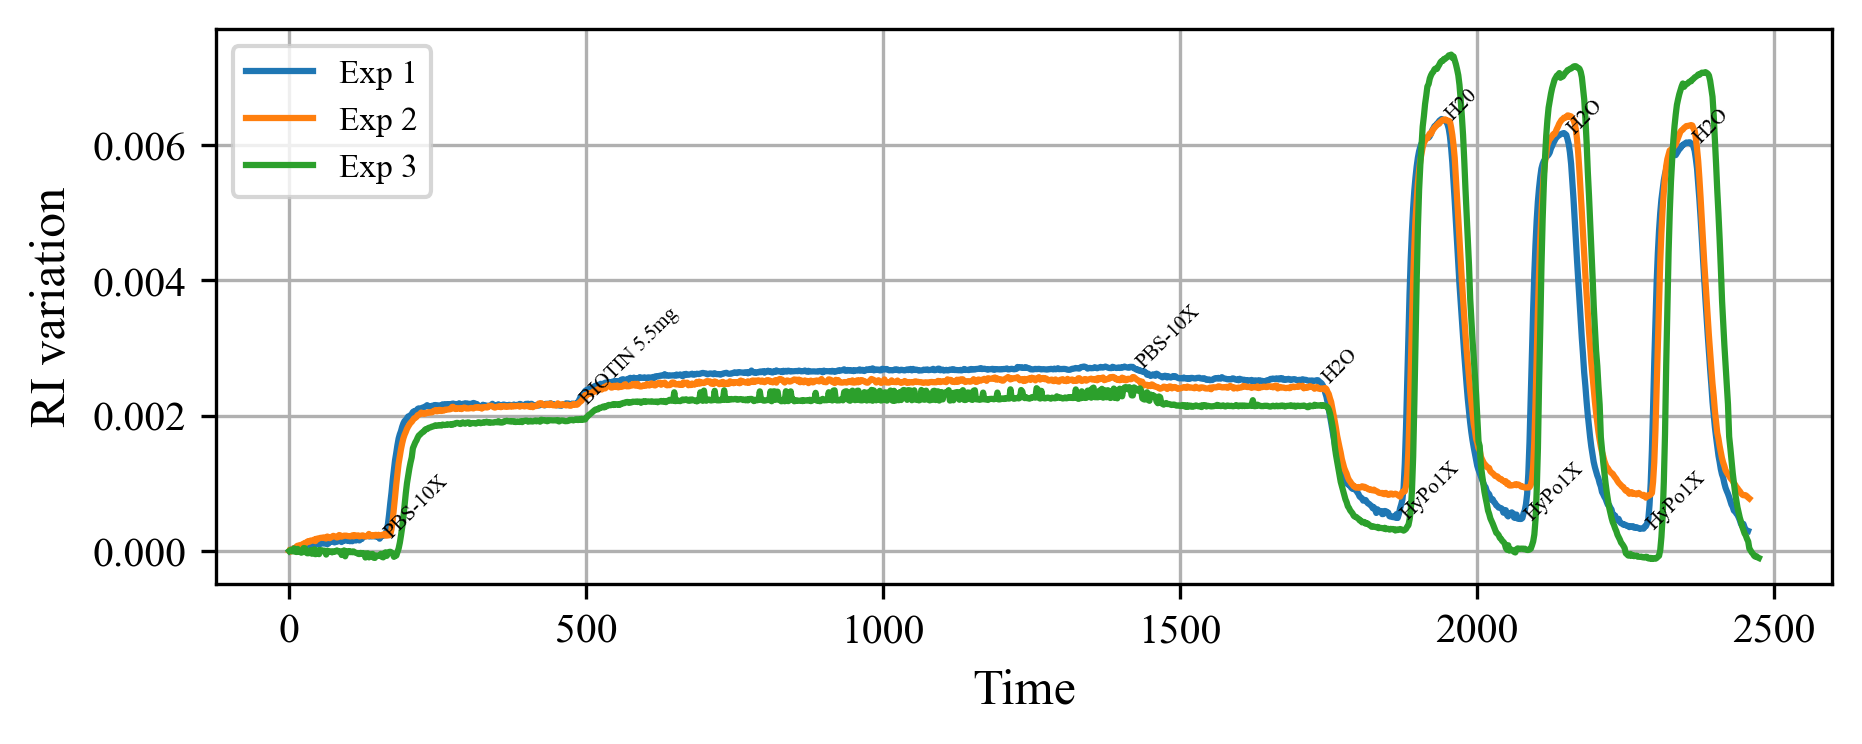

In [42]:
width_cm = 8.83*2
height_cm = 12.2/2
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54))
# Let's try to read the files with error handling
try:
    df1 = pd.read_csv(file_first5_5mg, sep=';', on_bad_lines='skip')
    df2 = pd.read_csv(file_second5_5mg, sep=';', on_bad_lines='skip')
    # The error was in the third file, so let's pay special attention to it.
    df3 = pd.read_csv(file_third5_5mg, sep=';', on_bad_lines='skip')

    # Clean up column names by stripping whitespace
    df1.columns = [col.strip() for col in df1.columns]
    df2.columns = [col.strip() for col in df2.columns]
    df3.columns = [col.strip() for col in df3.columns]

    # Convert columns to numeric, coercing errors
    for df in [df1, df2, df3]:
        for col in ['Time', 'Refractive Index', 'Temperature']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with NaN values in crucial columns
    df1.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df2.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df3.dropna(subset=['Time', 'Refractive Index'], inplace=True)


    # --- Plotting the three "ONLY ONE" experiments ---
    plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54), dpi = 300)
    # plt.title('Three repetitions of the same experiment')
    plt.xlabel('Time')
    plt.ylabel('RI variation')

    plt.plot(df1['Time'], df1['Refractive Index'], label='Exp 1')
    for _, row in df1[df1['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45,fontsize = 5)

    plt.plot(df2['Time'], df2['Refractive Index'], label='Exp 2')
    # for _, row in df2[df2['Comment'].notna()].iterrows():
    #     plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45)

    plt.plot(df3['Time'], df3['Refractive Index'], label='Exp 3')
    # for _, row in df3[df3['Comment'].notna()].iterrows():
    #     plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45)

    plt.legend()
    plt.grid(True)
    plt.savefig('BiotinPlots/only_one_experiments_Biotin5_5mg_BIGGER.pdf', bbox_inches='tight')
    plt.savefig('BiotinPlots/only_one_experiments_Biotin5_5mg_BIGGER.png', bbox_inches='tight', transparent = 'true')
    plt.rc("font", family="times new roman", size=12)  # Use the default serif font

except Exception as e:
    print(f"An error occurred: {e}")

## 1.2 Biotin View

Processing segment: Exp 1
  Found segment from t=484.007 to t=1419.98
Processing segment: Exp 2
  Found segment from t=484.006 to t=1426.048
Processing segment: Exp 3
  Found segment from t=498.085 to t=1450.078

Successfully generated the plot of all specified segments.


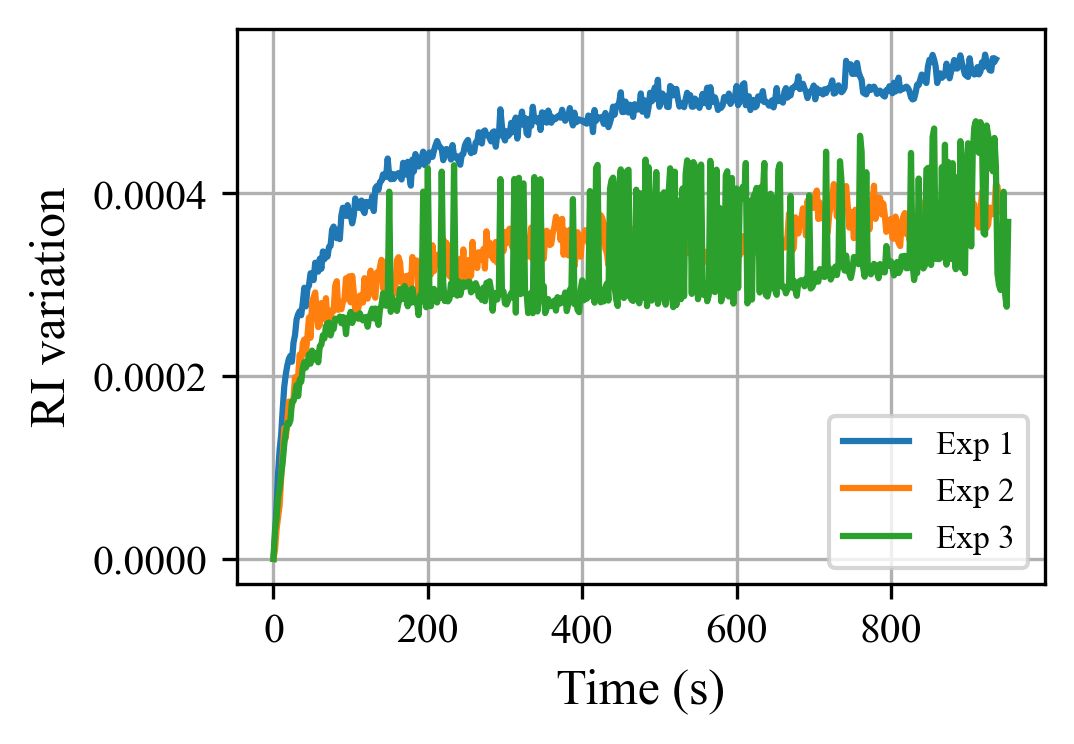

In [43]:
# --- Function to find, normalize, and plot a segment ---
def plot_segment(df, label, ax):
    """Finds the 'biotin' to 'h2o'/'pbs' segment, normalizes, and plots it."""
    print(f"Processing segment: {label}")
    # Find start and end points
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    
    if start_rows.empty:
        print(f"  --> Biotin comment not found for {label}. Skipping.")
        return
        
    start_row = start_rows.iloc[0]
    
    # Define the search space for the end comment as everything after the start comment
    search_df = df[df['Time'] > start_row['Time']]
    
    # Try finding H2O first, then PBS as a fallback
    end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]
    if end_rows.empty:
        print(f"  'H2O' comment not found, looking for 'PBS'...")
        end_rows = search_df[search_df['Comment'].str.contains('PBS', na=False)]

    if end_rows.empty:
        print(f"  --> Could not find H2O/PBS comment after biotin for {label}. Skipping.")
        return

    end_row = end_rows.iloc[0]

    start_time = start_row['Time']
    end_time = end_row['Time']

    print(f"  Found segment from t={start_time} to t={end_time}")

    # Slice the dataframe
    segment = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)].copy()

    # Normalize time and refractive index
    segment['Normalized Time'] = segment['Time'] - start_time
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index

    # Plot the segment
    ax.plot(segment['Normalized Time'], segment['Normalized Refractive Index'], label=label)

# --- Main script ---

# Create Figure
width_cm = 8.83
height_cm = 6.1
fig, ax = plt.subplots(figsize=(width_cm / 2.54, height_cm / 2.54), dpi=300)
# ax.set_title('Change in Refractive Index from Biotin to H2O/PBS rinse')
ax.set_xlabel('Time (s)')
ax.set_ylabel('RI variation')

# Process the three "ONLY ONE" files
files_only_one = {
    "Exp 1": file_first5_5mg,
    "Exp 2": file_second5_5mg,
    "Exp 3": file_third5_5mg,
}

for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        df['Comment'] = df['Comment'].astype(str).str.lower()
        plot_segment(df, label, ax)
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# Finalize plot
ax.legend()
plt.rc("font", family="times new roman", size=12)
ax.grid(True)
plt.savefig('BiotinPlots/biotin_to_h2o_pbs_segments5_5mg.pdf', bbox_inches='tight')
plt.savefig('BiotinPlots/biotin_to_h2o_pbs_segments5_5mg.svg', bbox_inches='tight',transparent = 'true')


print("\nSuccessfully generated the plot of all specified segments.")

## 1.3 Biotin + PBS desorption

Processing segment for: Exp_recalib 1
  Found segment from t=484.01 (biotin) to t=1734.01 (H20)
Processing segment for: Exp_recalib 2
  Found segment from t=484.01 (biotin) to t=1746.03 (H20)
Processing segment for: Exp_recalib 3
  Found segment from t=498.08 (biotin) to t=1744.09 (H20)

Successfully generated the plot for separated experiments.


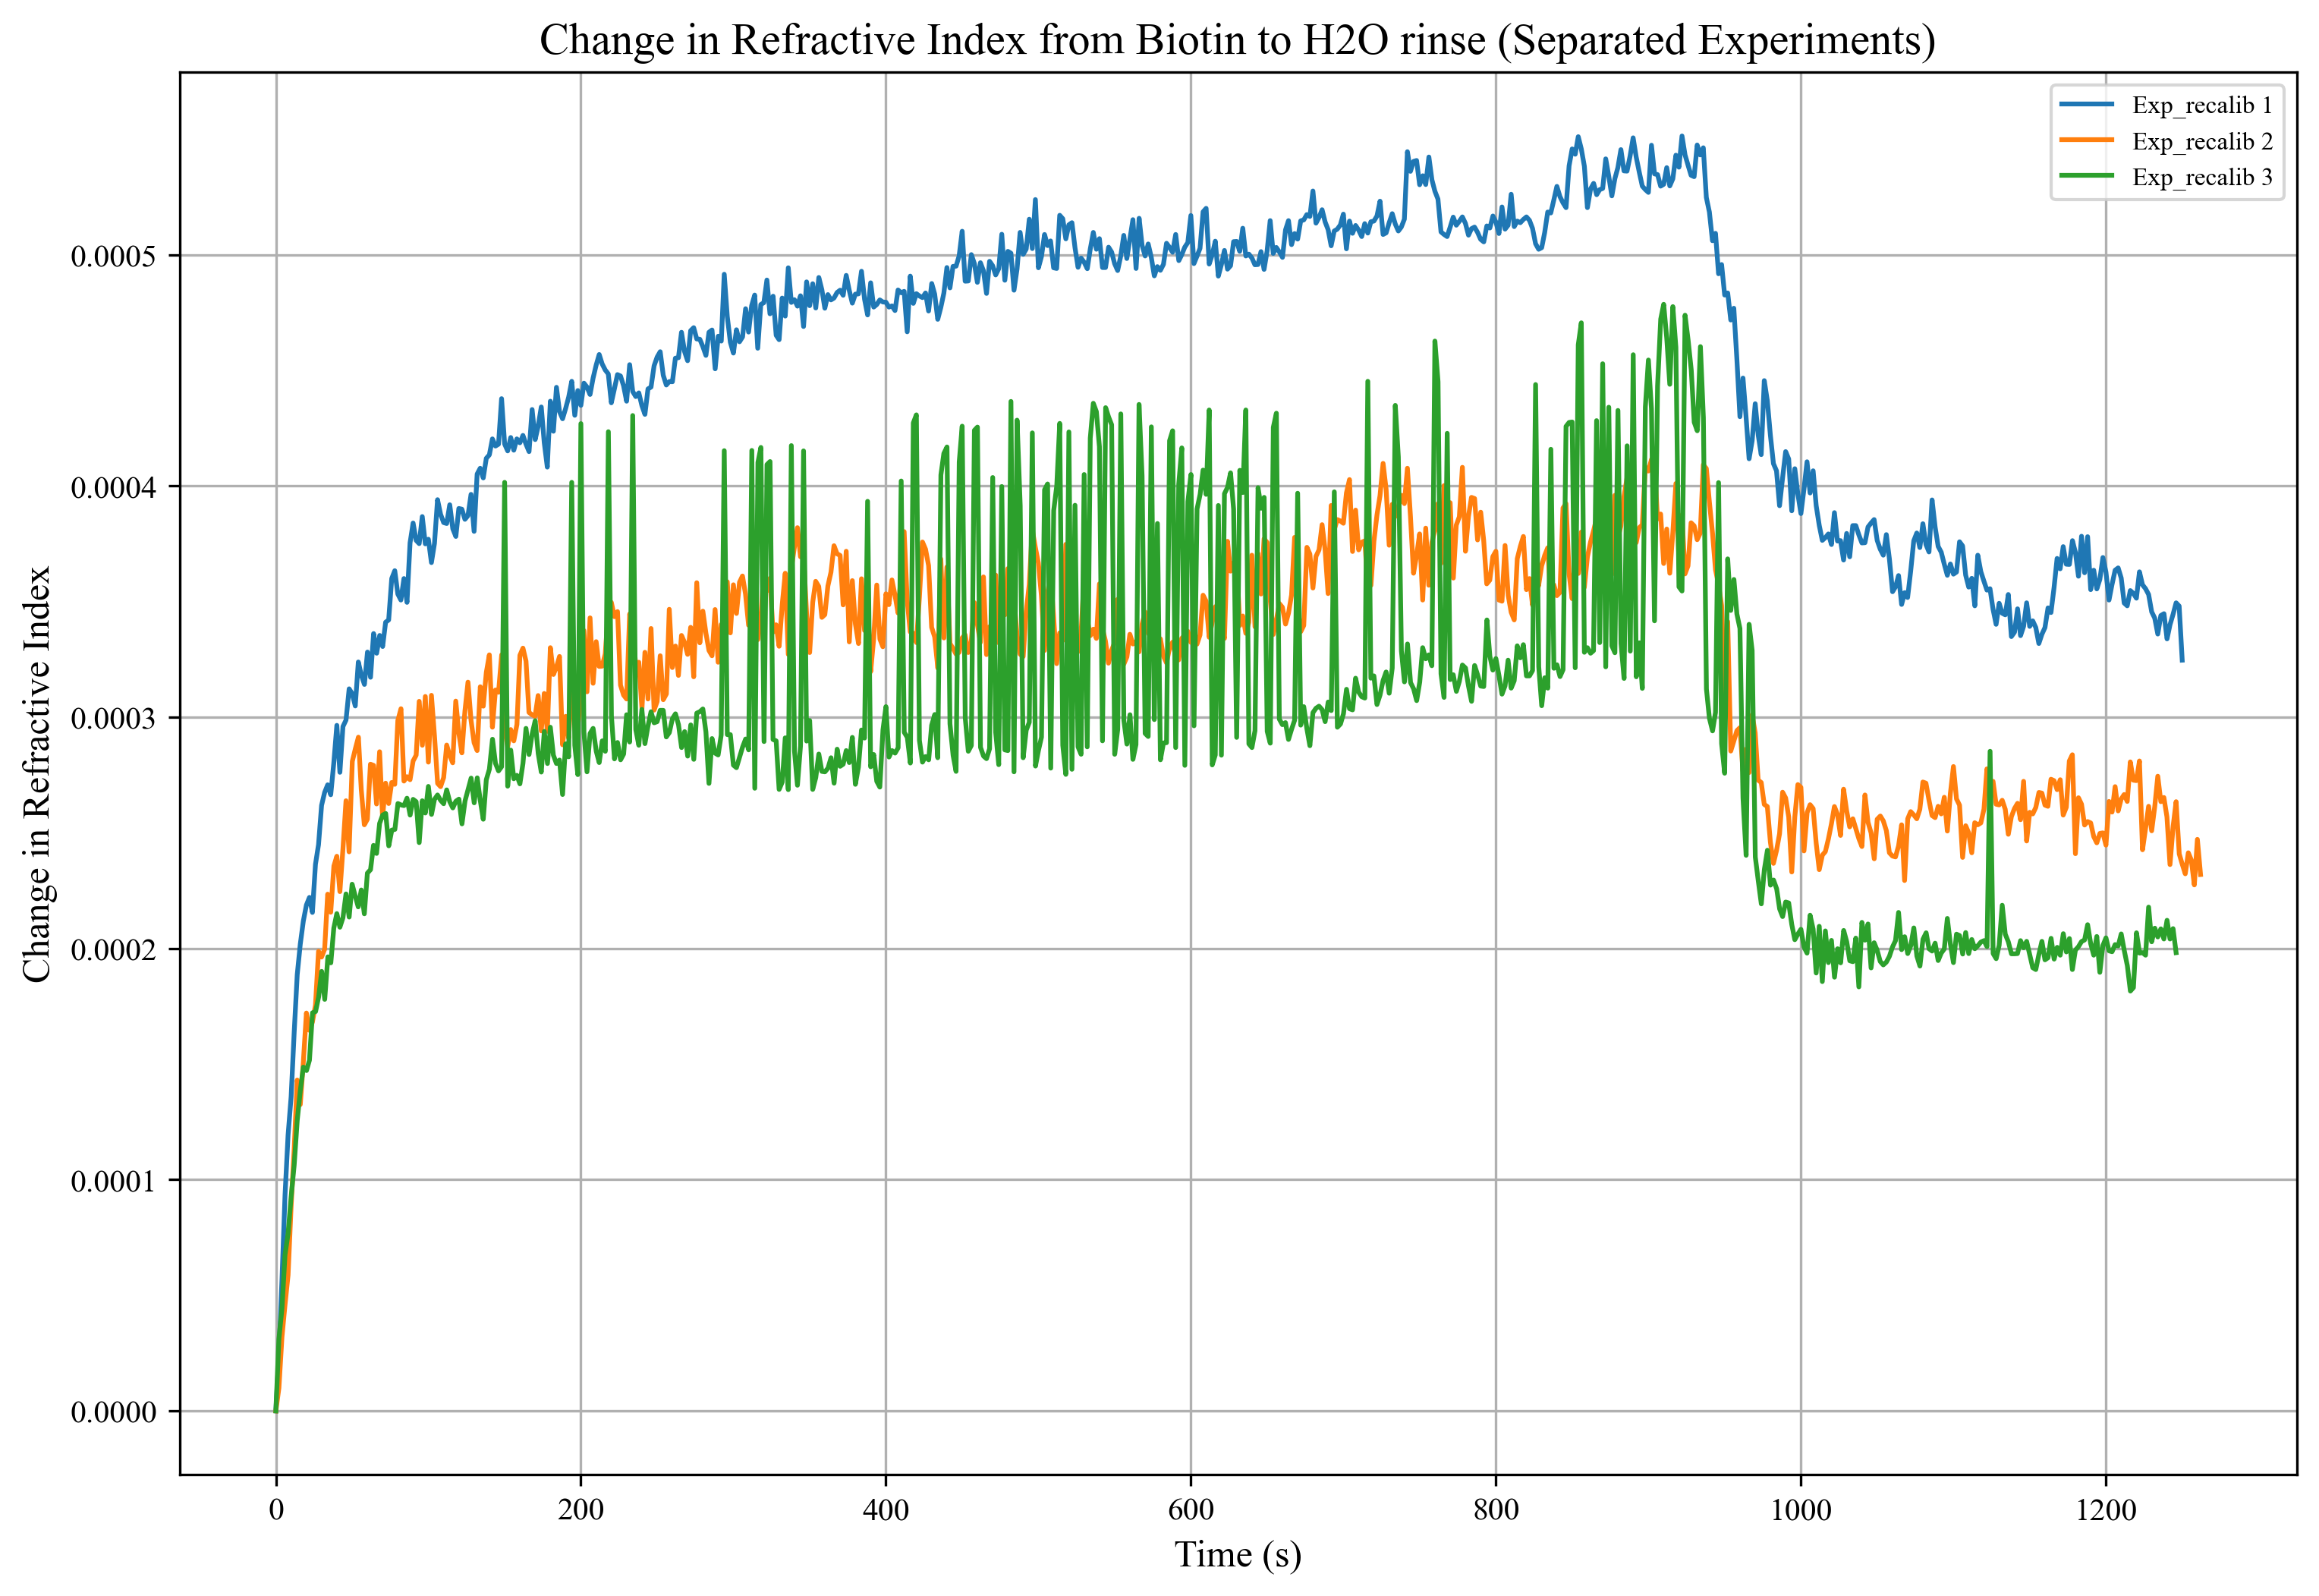

In [44]:
# --- Function to extract and plot a data segment ---
def plot_extended_segment(df, label, ax):
    """
    Finds the segment from 'biotin' to 'h20', normalizes, and plots it.
    """
    print(f"Processing segment for: {label}")
    # Find start row ('biotin')
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty:
        print(f"  --> Biotin comment not found. Skipping.")
        return
    start_row = start_rows.iloc[0]

    # Find end row ('h20') that occurs AFTER the start row
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h2o', na=False)]
    if end_rows.empty:
        print(f"  --> H20 comment not found after biotin. Skipping.")
        return
    end_row = end_rows.iloc[0]

    start_time = start_row['Time']
    end_time = end_row['Time']
    print(f"  Found segment from t={start_time:.2f} (biotin) to t={end_time:.2f} (H20)")

    # Slice the dataframe
    segment = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)].copy()
    if segment.empty:
        print(f"  --> Segment is empty. Skipping.")
        return

    # Normalize time and refractive index
    segment['Normalized Time'] = segment['Time'] - start_time
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index

    # Plot the segment
    ax.plot(segment['Normalized Time'], segment['Normalized Refractive Index'], label=label)

# --- Plot 1: Separated Experiments ---
fig1, ax1 = plt.subplots(figsize=(12, 8), dpi=300)
ax1.set_title('Change in Refractive Index from Biotin to H2O rinse (Separated Experiments)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Change in Refractive Index')

files_only_one = {
    "Exp_recalib 1": file_first5_5mg,
    "Exp_recalib 2": file_second5_5mg,
    "Exp_recalib 3": file_third5_5mg,
}

for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        df['Comment'] = df['Comment'].astype(str).str.lower()
        plot_extended_segment(df, label, ax1)
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# Finalize Plot 1
ax1.legend()
plt.rc("font", family="times new roman", size=12)
ax1.grid(True)
plt.savefig('BiotinPlots/separated_segments_extended5_5mg.pdf', bbox_inches='tight')

print("\nSuccessfully generated the plot for separated experiments.")


## 1.4 Numerical Analysis


--- Correlation Matrix for: Separated Exp ---
          Exp 1     Exp 2    Exp 3
Exp 1  1.000000  0.944159  0.78067
Exp 2  0.944159  1.000000  0.72075
Exp 3  0.780670  0.720750  1.00000
Heatmap saved to BiotinPlots/correlation_separated5_5mg.svg


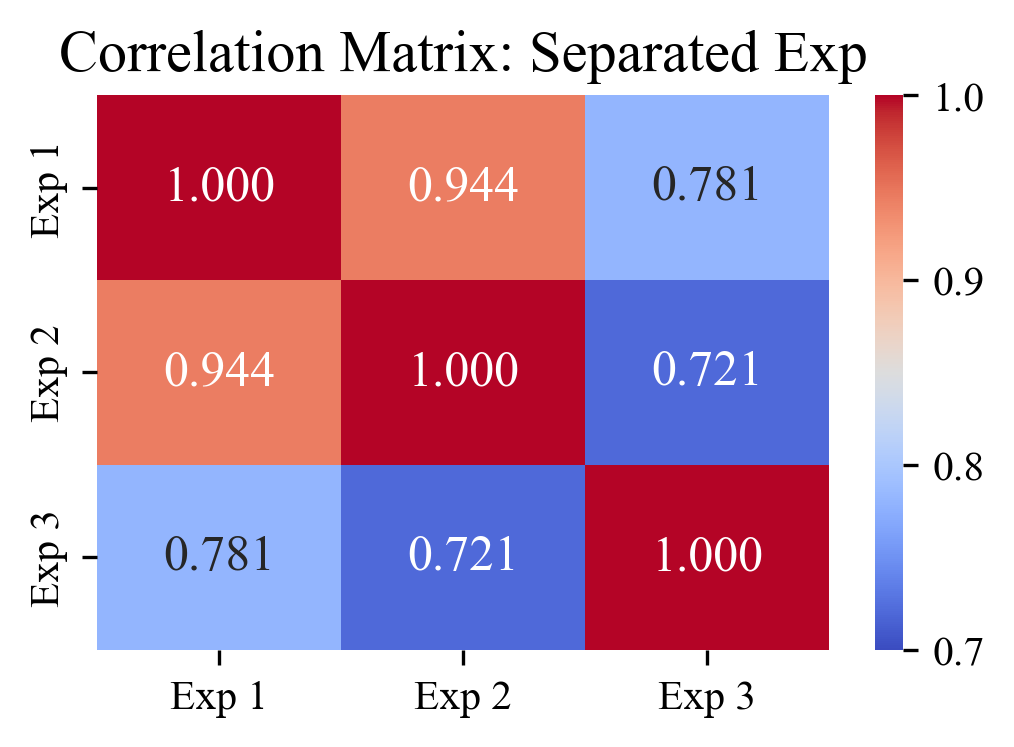

In [45]:
# --- Function to extract a data segment ---
def get_segment(df):
    """Finds and returns the 'biotin' to 'h2o'/'pbs' segment."""
    df['Comment'] = df['Comment'].astype(str).str.lower()
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty: return None
    start_row = start_rows.iloc[0]
    
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h20', na=False)] # 'h20' with a zero
    if end_rows.empty:
        end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]
    if end_rows.empty: return None
    end_row = end_rows.iloc[0]
    
    segment = df[(df['Time'] >= start_row['Time']) & (df['Time'] <= end_row['Time'])].copy()
    segment['Normalized Time'] = segment['Time'] - start_row['Time']
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index
    return segment

# --- Main script ---
def analyze_correlation(segments_dict, title, output_filename):
    """Interpolates segments, calculates correlation, and plots a heatmap."""
    # Find the minimum duration to create a common time axis
    min_duration = min(seg['Normalized Time'].max() for seg in segments_dict.values())
    common_time = np.linspace(0, min_duration, num=500)
    
    interpolated_data = {}
    for label, segment in segments_dict.items():
        # Interpolate each segment onto the common time axis
        interpolated_values = np.interp(common_time, segment['Normalized Time'], segment['Normalized Refractive Index'])
        interpolated_data[label] = interpolated_values
        
    # Create a DataFrame and calculate correlation
    df_interp = pd.DataFrame(interpolated_data)
    correlation_matrix = df_interp.corr()
    
    print(f"\n--- Correlation Matrix for: {title} ---")
    print(correlation_matrix)
    
    # Plot heatmap
    width_cm = 10
    height_cm = 6.1
    plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54),dpi = 300)
    sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=0.7, vmax=1.0,)
    plt.title(f'Correlation Matrix: {title}')
    plt.savefig(output_filename, bbox_inches='tight', transparent=True)
    print(f"Heatmap saved to {output_filename}")
# 1. Process Separated Experiments
files_only_one = {"Exp 1": file_first5_5mg, "Exp 2": file_second5_5mg, "Exp 3": file_third5_5mg}
separated_segments = {}
for label, path in files_only_one.items():
    df = pd.read_csv(path, sep=';', on_bad_lines='skip')
    df.columns = [col.strip() for col in df.columns]
    for col in ['Time', 'Refractive Index']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    segment = get_segment(df)
    if segment is not None:
        separated_segments[label] = segment

if len(separated_segments) > 1:
    analyze_correlation(separated_segments, 'Separated Exp', 'BiotinPlots/correlation_separated5_5mg.svg')

--- Feature Table ---
| Experiment   |   Max Signal |   Mean Signal |   Signal Std Dev |   Area Under Curve |
|:-------------|-------------:|--------------:|-----------------:|-------------------:|
| Exp 1        |    0.0042085 |   0.000410569 |      0.000839206 |           0.594128 |
| Exp 2        |    0.0004116 |   0.000334797 |      5.53695e-05 |           0.315684 |
| Exp 3        |    0.0004786 |   0.000315061 |      7.26069e-05 |           0.300195 |

PCA plot saved to pca_classification.png


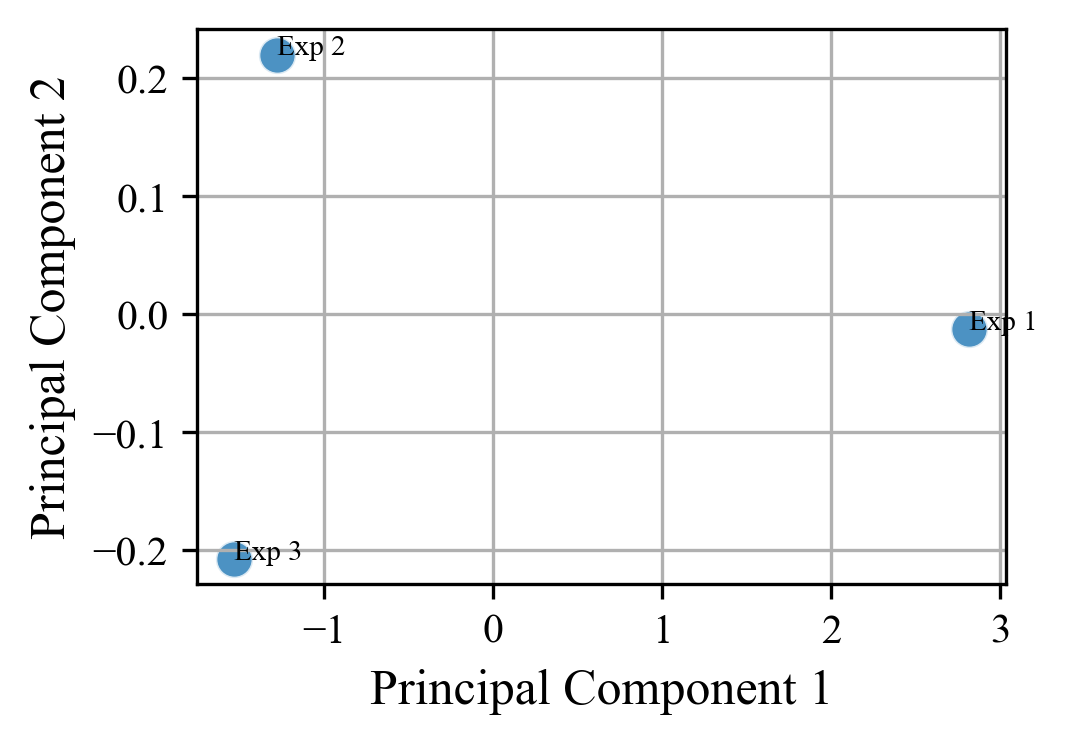

In [46]:
# --- Main script ---

# Create a list to hold the features for each experiment
feature_list = []
all_segments = {}

# 1. Process Separated Experiments
files_only_one = {"Exp 1": file_first5_5mg, "Exp 2": file_second5_5mg, "Exp 3": file_third5_5mg}
for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        segment = get_segment(df)
        if segment is not None:
            all_segments[label] = segment
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# 3. Extract Features and create a feature table
for label, segment in all_segments.items():
    # --- FIX IS HERE ---
    # Sort by time to ensure x-values are monotonic before calculating AUC
    segment = segment.sort_values(by='Normalized Time').drop_duplicates(subset=['Normalized Time'])
    
    features = {
        'Experiment': label,
        'Max Signal': segment['Normalized Refractive Index'].max(),
        'Mean Signal': segment['Normalized Refractive Index'].mean(),
        'Signal Std Dev': segment['Normalized Refractive Index'].std(),
        'Area Under Curve': auc(segment['Normalized Time'], segment['Normalized Refractive Index'])
    }
    feature_list.append(features)

feature_df = pd.DataFrame(feature_list)
print("--- Feature Table ---")
print(feature_df.to_markdown(index=False))

# 4. Perform PCA
# Separate features and labels
features_for_pca = feature_df.drop('Experiment', axis=1)
labels = feature_df['Experiment']

# Standardize the features
x = StandardScaler().fit_transform(features_for_pca)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, labels], axis=1)

# Add a 'Group' column for coloring the plot
final_df['Group'] = final_df['Experiment'].apply(lambda x: 'Full' if 'Full' in x else 'Separated')

# 5. Visualize PCA results
width_cm = 8.83
height_cm = 6.1
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54),dpi=300)
sns.scatterplot(x='Principal Component 1', y='Principal Component 2',data=final_df, s=80, alpha=0.8)

# Add labels to each point
for i, txt in enumerate(final_df.Experiment):
    plt.text(final_df['Principal Component 1'][i], final_df['Principal Component 2'][i], txt, fontsize=7)

# plt.title('2D PCA of Experiment Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('BiotinPlots/pca_classification5_5mg.svg', bbox_inches='tight', transparent=True)

print("\nPCA plot saved to pca_classification.png")


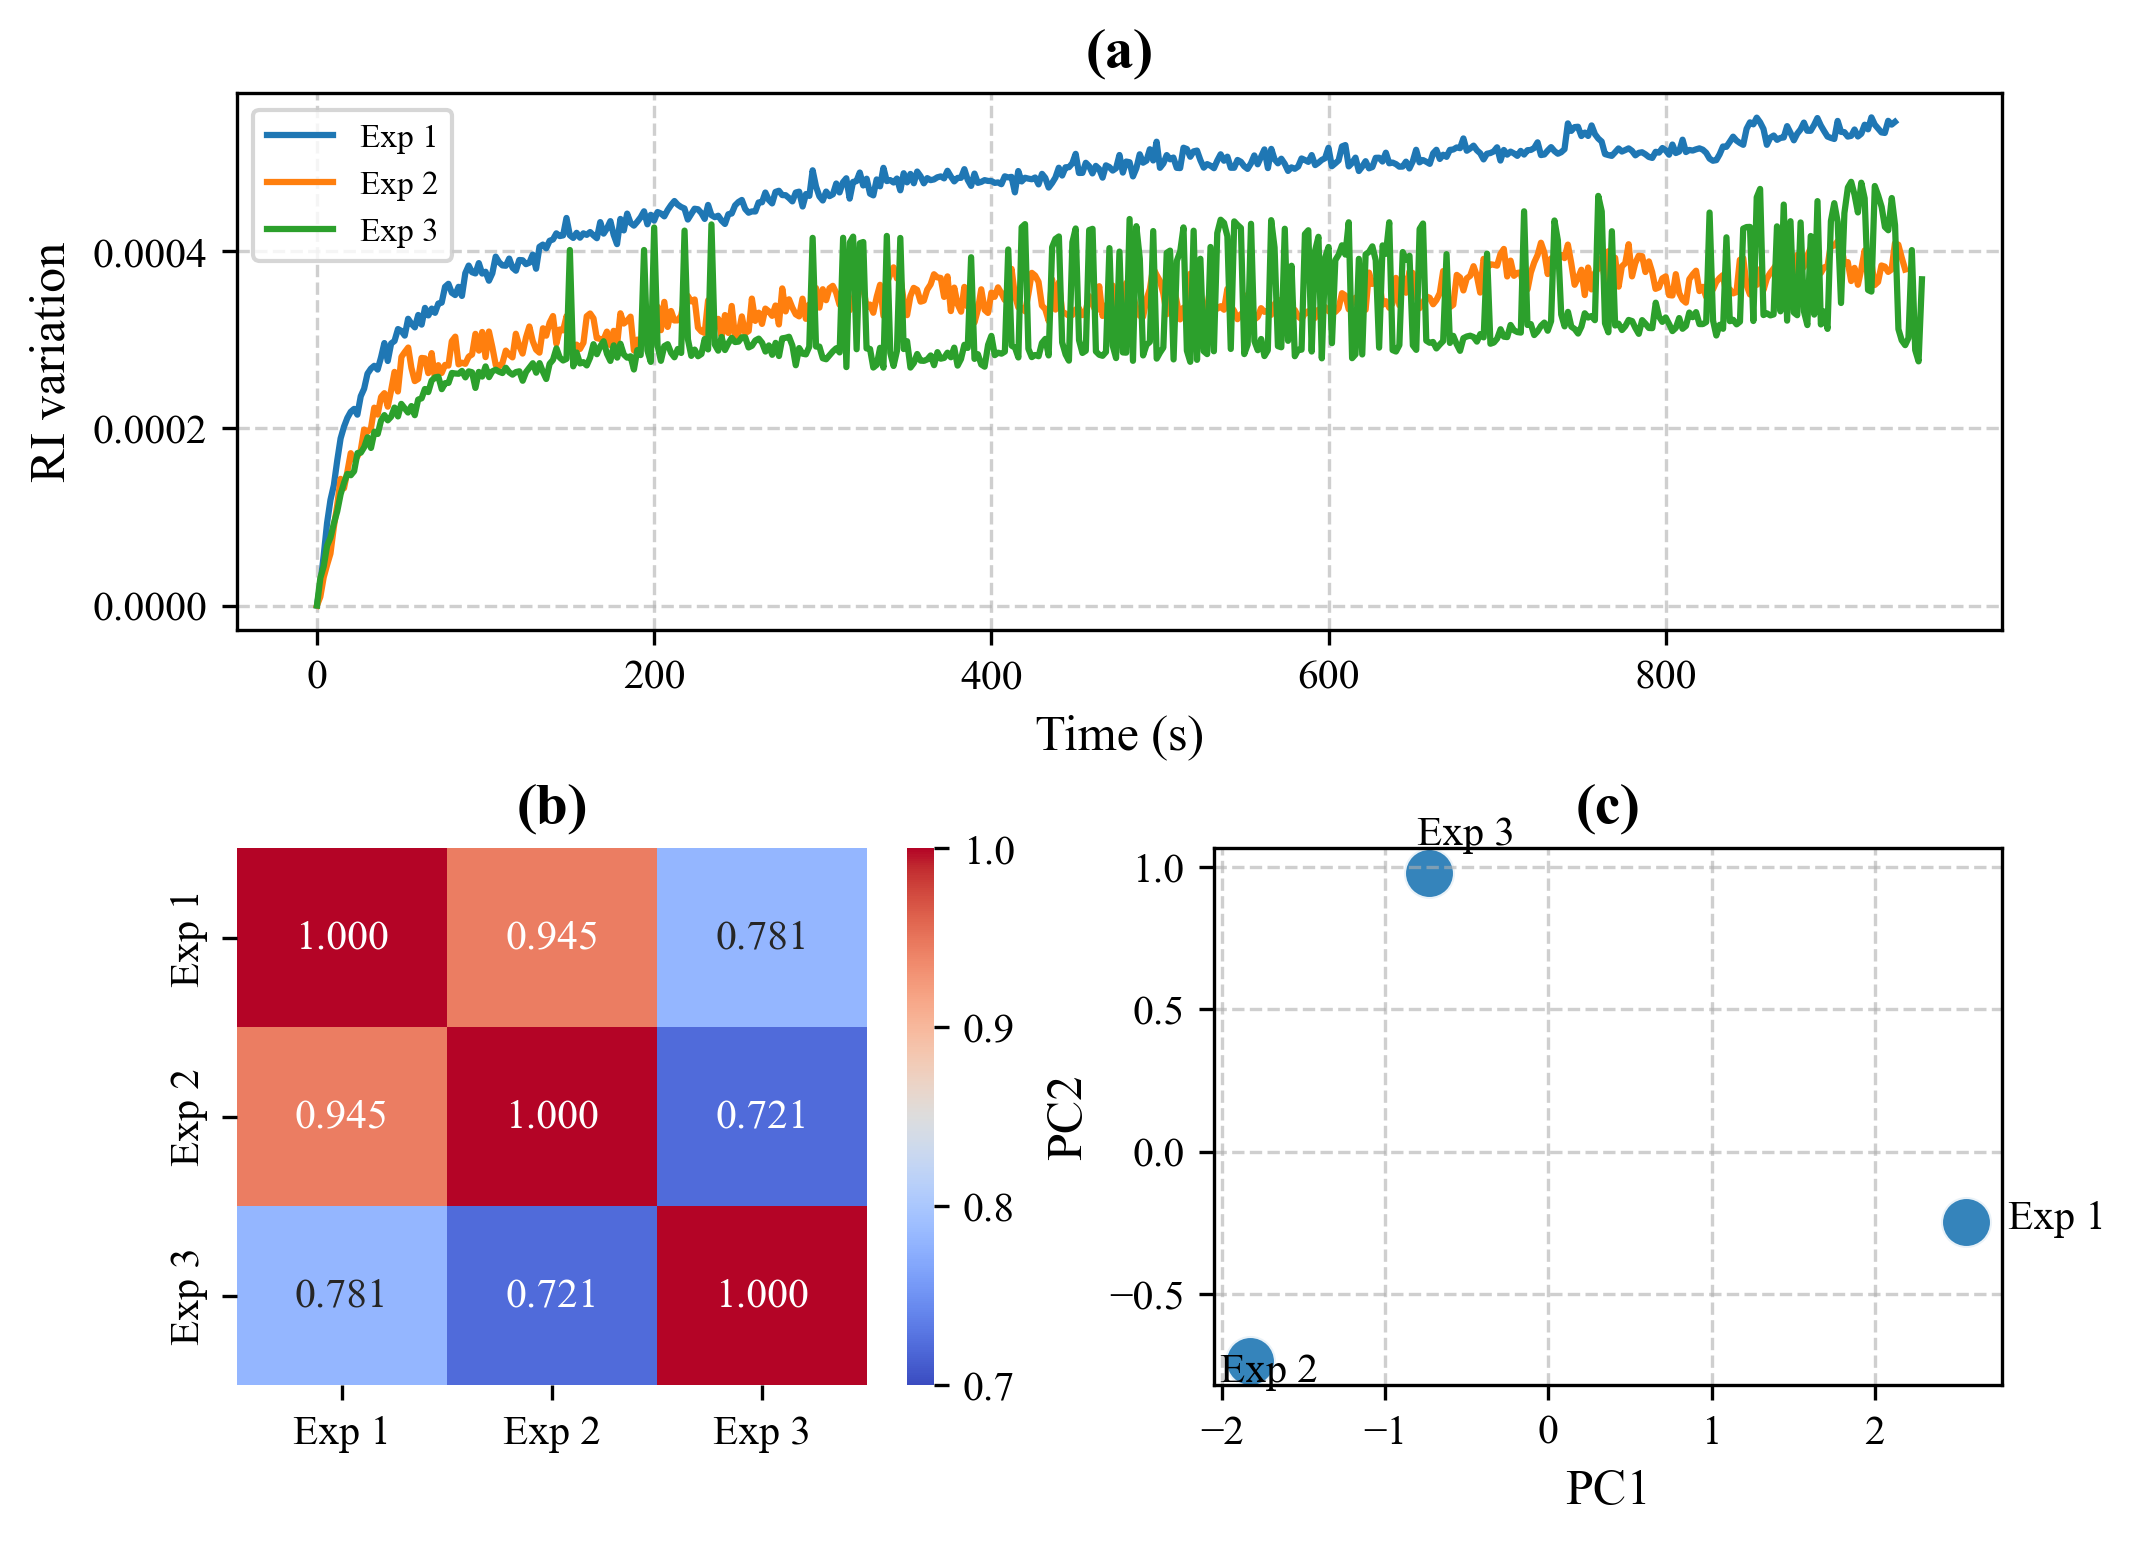


Successfully generated the custom layout figure: BiotinPlots\material_degradation_custom_layout.pdf


In [66]:
def get_segment(df):
    """Finds and returns the 'biotin' to 'h2o'/'pbs' segment."""
    df['Comment'] = df['Comment'].astype(str).str.lower()
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty: return None
    start_row = start_rows.iloc[0]
    
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h20|pbs', na=False, regex=True)]
    if end_rows.empty: return None
    end_row = end_rows.iloc[0]
    
    segment = df[(df['Time'] >= start_row['Time']) & (df['Time'] <= end_row['Time'])].copy()
    if segment.empty: return None
    
    segment['Normalized Time'] = segment['Time'] - start_row['Time']
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index
    return segment

def plot_segment(df, label, ax):
    """Helper to extract and plot a normalized segment."""
    segment = get_segment(df)
    if segment is not None:
        ax.plot(segment['Normalized Time'], segment['Normalized Refractive Index'], label=label)

# --- 3. MAIN SCRIPT ---

try:
    # --- Load Data ---
    files_only_one = {
        "Exp 1": file_first5_5mg,
        "Exp 2": file_second5_5mg,
        "Exp 3": file_third5_5mg,
    }
    
    dataframes = {}
    for label, path in files_only_one.items():
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
             df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        dataframes[label] = df

    # --- Setup the Custom Figure Layout ---
    fig = plt.figure(figsize=(18 / 2.54, 13 / 2.54), dpi=300)
    
    # Define subplot locations in a 2x2 grid
    ax_a = plt.subplot2grid((2, 2), (0, 0), colspan=2) # Top plot, spanning 2 columns
    ax_b = plt.subplot2grid((2, 2), (1, 0))             # Bottom-left plot
    ax_c = plt.subplot2grid((2, 2), (1, 1))             # Bottom-right plot

    # --- Generate Subplot (a): Normalized Sensorgrams ---
    for label, df_in in dataframes.items():
        plot_segment(df_in.copy(), label, ax_a)
    ax_a.set_title('(a)', weight='bold')
    ax_a.set_xlabel('Time (s)')
    ax_a.set_ylabel('RI variation')
    ax_a.legend()
    ax_a.grid(True, linestyle='--', alpha=0.6)

    # --- Generate Subplot (b): Correlation Matrix ---
    corr_segments = {label: get_segment(df.copy()) for label, df in dataframes.items()}
    
    min_duration = min(seg['Normalized Time'].max() for seg in corr_segments.values())
    common_time = np.linspace(0, min_duration, num=500)
    interpolated_data = {label: np.interp(common_time, seg['Normalized Time'], seg['Normalized Refractive Index']) for label, seg in corr_segments.items()}
    df_interp = pd.DataFrame(interpolated_data)
    correlation_matrix = df_interp.corr()

    sns.heatmap(correlation_matrix, ax=ax_b, annot=True, fmt=".3f", cmap='coolwarm', vmin=0.7, vmax=1.0, annot_kws={"size": 10})
    ax_b.set_title('(b)', weight='bold')

    # --- Generate Subplot (c): Principal Component Analysis ---
    feature_list = []
    for label, segment in corr_segments.items():
        segment = segment.sort_values(by='Normalized Time').drop_duplicates(subset=['Normalized Time'])
        features = {
            'Experiment': label,
            'Max Signal': segment['Normalized Refractive Index'].max(),
            'Mean Signal': segment['Normalized Refractive Index'].mean(),
            'Signal Std Dev': segment['Normalized Refractive Index'].std(),
            'Area Under Curve': auc(segment['Normalized Time'], segment['Normalized Refractive Index'])
        }
        feature_list.append(features)
    feature_df = pd.DataFrame(feature_list)

    features_for_pca = feature_df.drop('Experiment', axis=1)
    labels = feature_df['Experiment']
    x = StandardScaler().fit_transform(features_for_pca)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principal_df = pd.DataFrame(data=principalComponents, columns=['PC 1', 'PC 2'])
    final_df = pd.concat([principal_df, labels], axis=1)

    sns.scatterplot(x='PC 1', y='PC 2', data=final_df, s=150, alpha=0.9, ax=ax_c, legend=False)
    for i, txt in enumerate(final_df.Experiment):
        ax_c.text(final_df['PC 1'][i] * 1.1, final_df['PC 2'][i] * 1.1, txt, fontsize=10)

    ax_c.set_title('(c)', weight='bold')
    ax_c.set_xlabel('PC1')
    ax_c.set_ylabel('PC2')
    ax_c.grid(True, linestyle='--', alpha=0.6)

    # --- Finalize and Save ---
    plt.tight_layout(pad=0.5)
    output_filename = os.path.join(output_dir, 'material_degradation_custom_layout.pdf')
    plt.savefig(output_filename)
    plt.savefig(output_filename.replace('.pdf', '.svg'), transparent=True)
    plt.show()

    print(f"\nSuccessfully generated the custom layout figure: {output_filename}")

except FileNotFoundError:
    print("ERROR: One or more data files not found. Please check the placeholder paths.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")